# Initialize and load data / Kh·ªüi t·∫°o v√† t·∫£i d·ªØ li·ªáu

We start by importing the necessary libraries and loading data from the `EV_Charging_Patterns.csv` file, which contains information about the charging behavior of electric vehicle users. / Ch√∫ng t√¥i b·∫Øt ƒë·∫ßu b·∫±ng c√°ch nh·∫≠p c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt v√† t·∫£i d·ªØ li·ªáu t·ª´ t·ªáp `EV_Charging_Patterns.csv`, t·ªáp n√†y ch·ª©a th√¥ng tin v·ªÅ h√†nh vi s·∫°c c·ªßa ng∆∞·ªùi d√πng xe ƒëi·ªán.


In [ ]:
import pandas as pd

# Load the dataset /  T·∫£i t·∫≠p d·ªØ li·ªáu
file_path = 'ev_charging_patterns.csv'
df = pd.read_csv(file_path)

# Inspect the structure of the dataset /  Ki·ªÉm tra c·∫•u tr√∫c c·ªßa t·∫≠p d·ªØ li·ªáu
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nSummary statistics of the dataset:")
print(df.describe())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

First 5 rows of the dataset:
  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346      

# Check Data Leakage / Ki·ªÉm tra r√≤ r·ªâ d·ªØ li·ªáu


In [73]:
# Ki·ªÉm tra Leakage
leak_columns = ['User ID', 'Vehicle ID', 'Charging End Time']  # C√°c c·ªôt c√≥ th·ªÉ g√¢y leakage
cols_to_drop = [col for col in leak_columns if col in df.columns]

if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"‚úÖ ƒê√£ lo·∫°i b·ªè c√°c c·ªôt c√≥ nguy c∆° leakage: {cols_to_drop}")
else:
    print("‚úÖ Kh√¥ng ph√°t hi·ªán c·ªôt c√≥ nguy c∆° leakage.")

‚úÖ ƒê√£ lo·∫°i b·ªè c√°c c·ªôt c√≥ nguy c∆° leakage: ['User ID', 'Charging End Time']


# Exploratory Data Analysis (EDA) /  Ph√¢n t√≠ch d·ªØ li·ªáu thƒÉm d√≤ (EDA)
Perform basic EDA to understand the dataset, including checking for null values, data types, and summary statistics. / Th·ª±c hi·ªán EDA c∆° b·∫£n ƒë·ªÉ hi·ªÉu t·∫≠p d·ªØ li·ªáu, bao g·ªìm ki·ªÉm tra gi√° tr·ªã null, ki·ªÉu d·ªØ li·ªáu v√† s·ªë li·ªáu th·ªëng k√™ t√≥m t·∫Øt.


Unique values in each column:
User ID: 1320 unique values
Vehicle Model: 5 unique values
Battery Capacity (kWh): 147 unique values
Charging Station ID: 462 unique values
Charging Station Location: 5 unique values
Charging Start Time: 1320 unique values
Charging End Time: 1309 unique values
Energy Consumed (kWh): 1254 unique values
Charging Duration (hours): 1320 unique values
Charging Rate (kW): 1254 unique values
Charging Cost (USD): 1320 unique values
Time of Day: 4 unique values
Day of Week: 7 unique values
State of Charge (Start %): 1320 unique values
State of Charge (End %): 1320 unique values
Distance Driven (since last charge) (km): 1254 unique values
Temperature (¬∞C): 1320 unique values
Vehicle Age (years): 114 unique values
Charger Type: 3 unique values
User Type: 3 unique values

Distribution of the target variable (User Type):
User Type
Commuter                  476
Long-Distance Traveler    437
Casual Driver             407
Name: count, dtype: int64


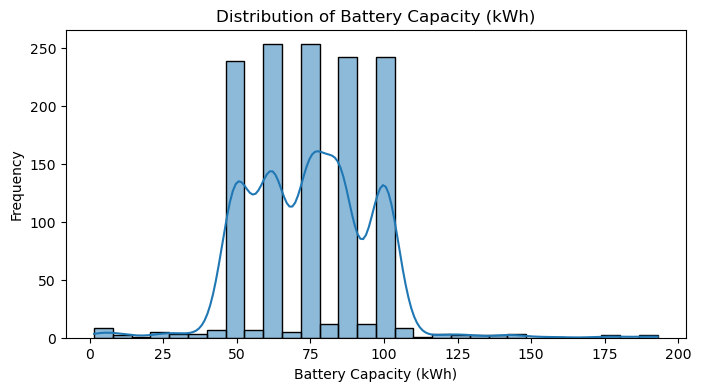

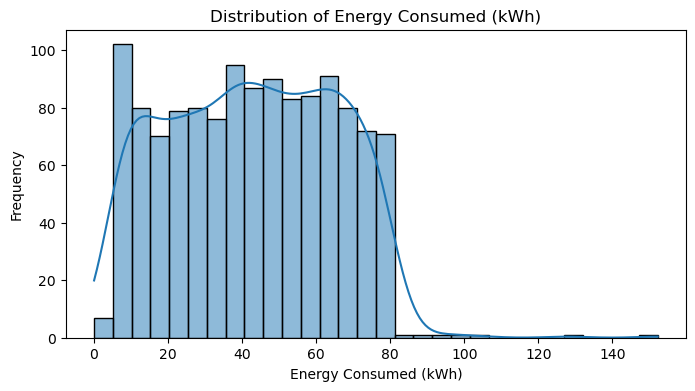

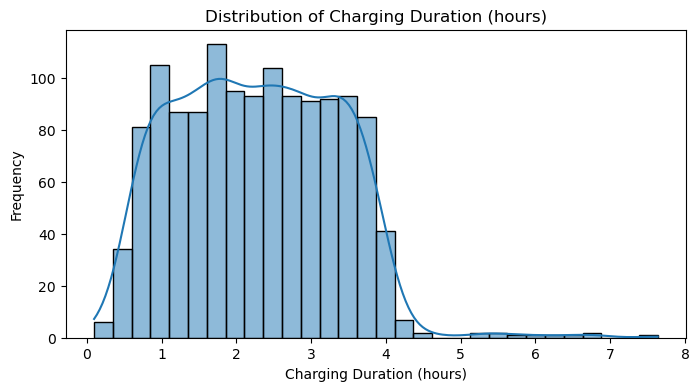

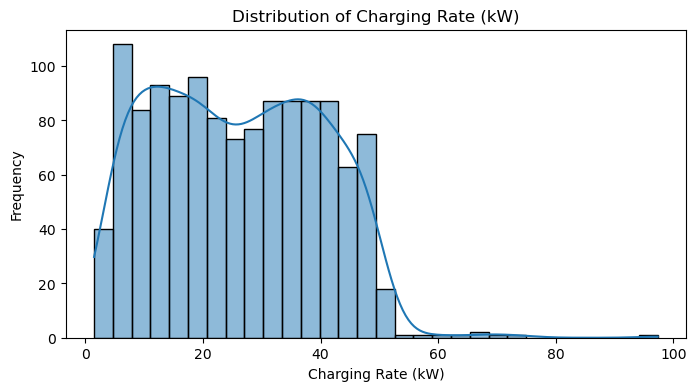

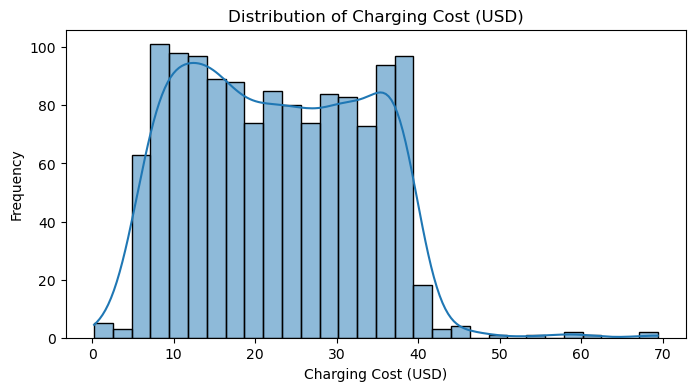

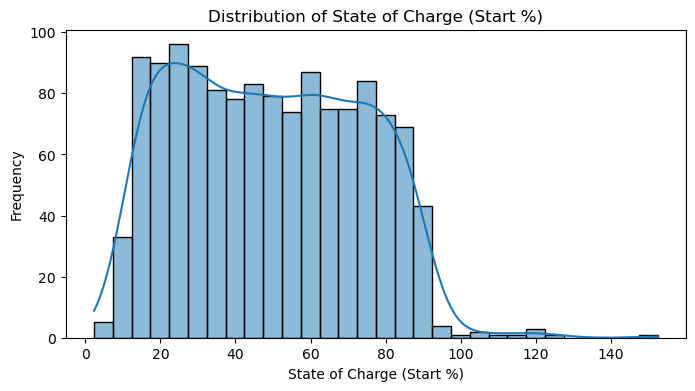

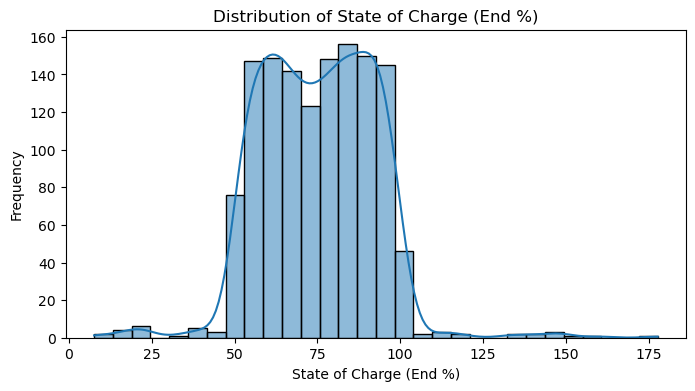

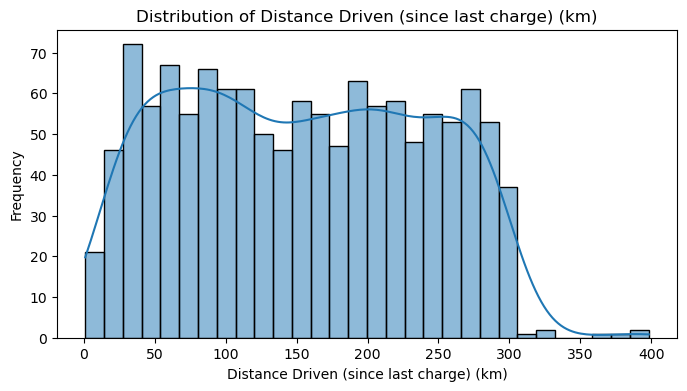

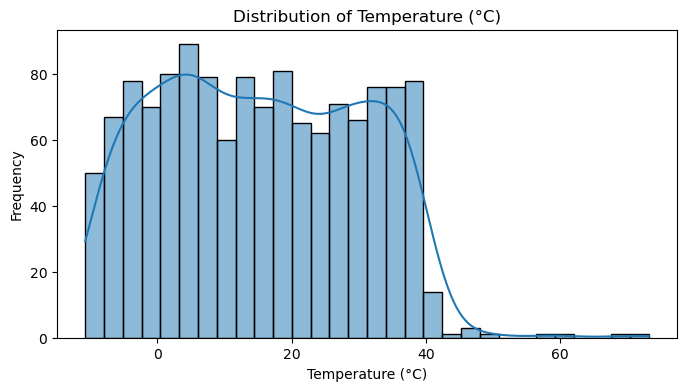

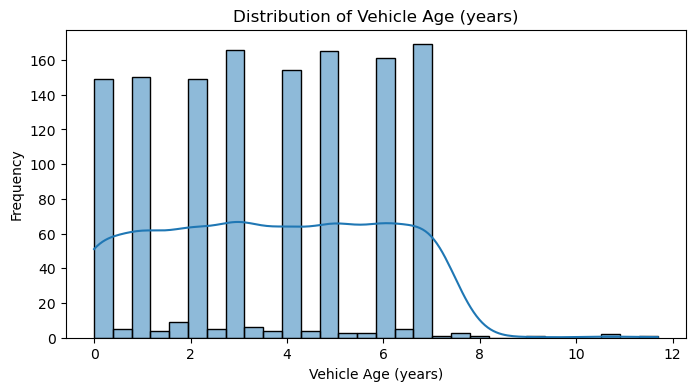

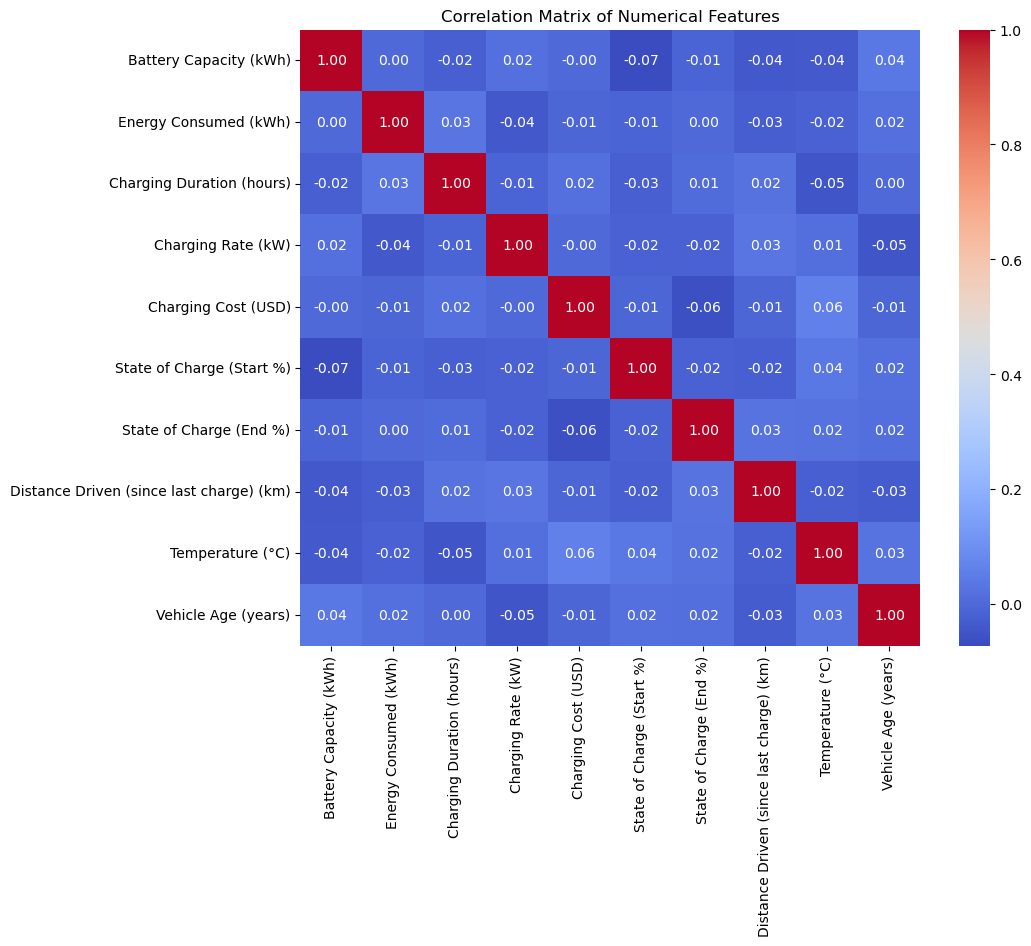

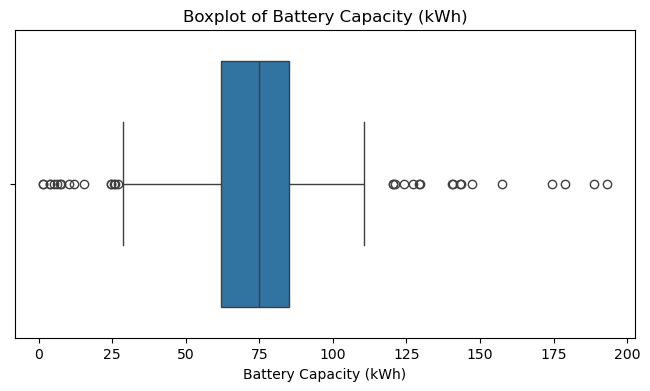

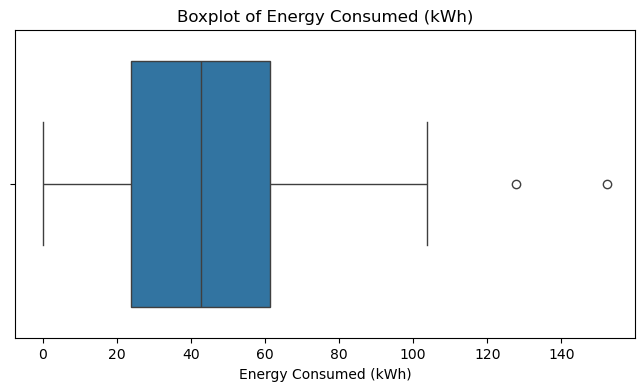

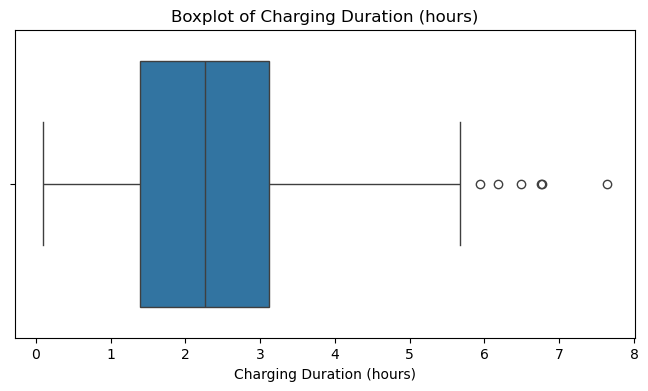

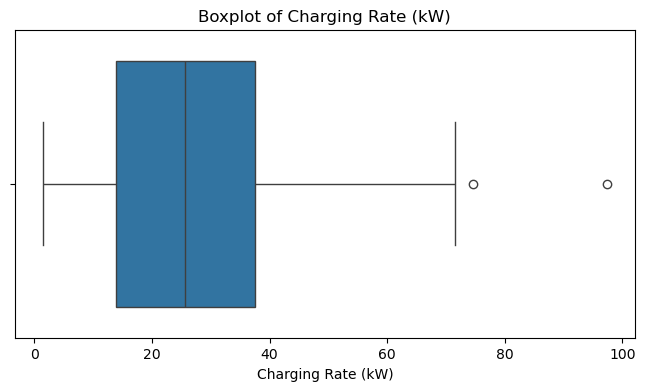

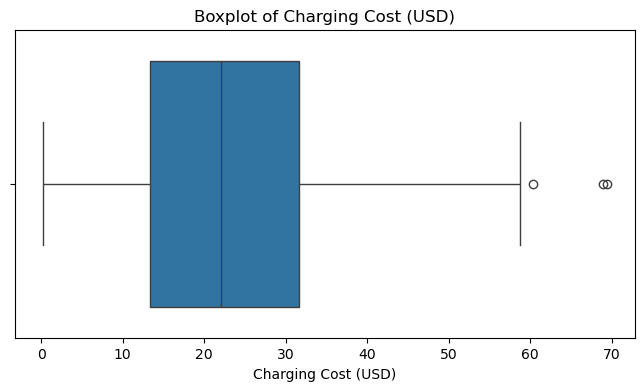

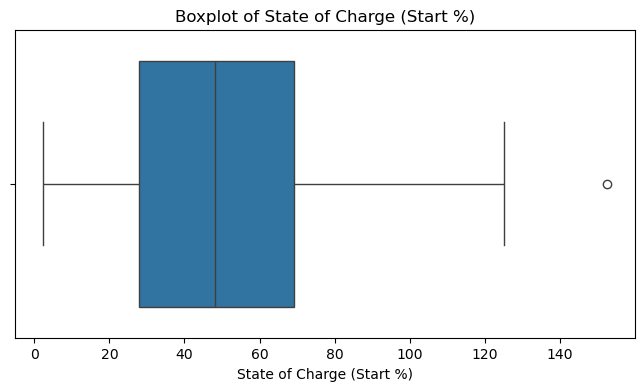

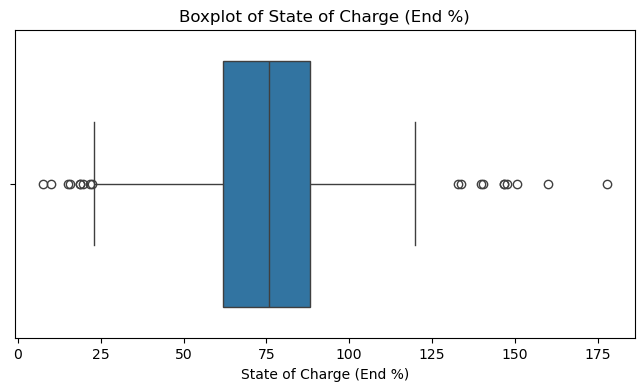

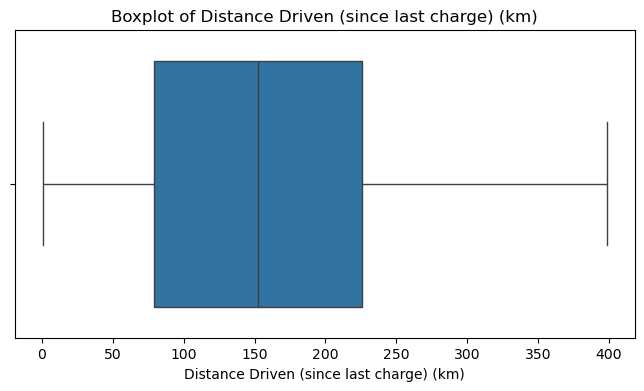

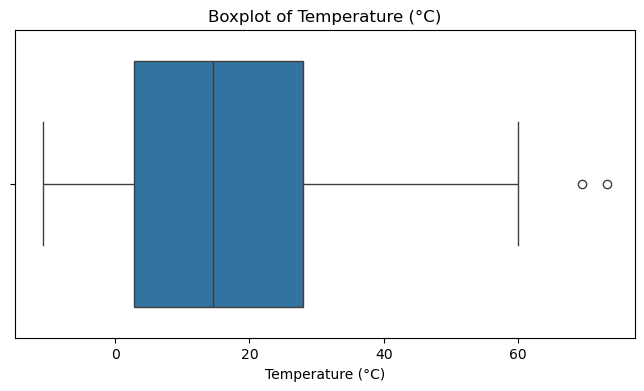

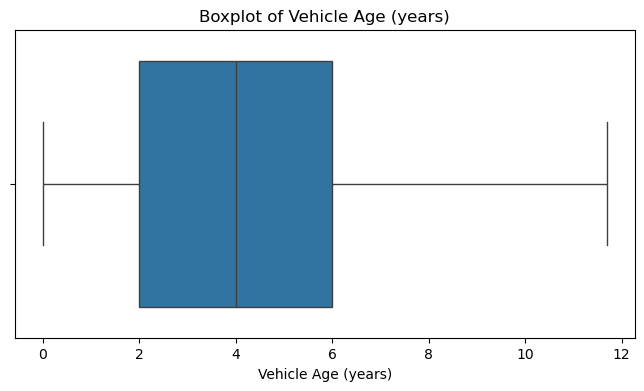

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "ev_charging_patterns.csv"  # Update this path if necessary / C·∫≠p nh·∫≠t ƒë∆∞·ªùng d·∫´n n√†y n·∫øu c·∫ßn thi·∫øt
df = pd.read_csv(file_path)

# Check for unique values in each column /  Ki·ªÉm tra c√°c gi√° tr·ªã duy nh·∫•t trong m·ªói c·ªôt
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Check the distribution of the target variable /  Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u
print("\nDistribution of the target variable (User Type):")
print(df['User Type'].value_counts())

# Visualize the distribution of numerical features / H√¨nh dung s·ª± ph√¢n b·ªë c·ªßa c√°c ƒë·∫∑c ƒëi·ªÉm s·ªë
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Visualize correlations between numerical features / H√¨nh dung m·ªëi t∆∞∆°ng quan gi·ªØa c√°c t√≠nh nƒÉng s·ªë
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Check for outliers using boxplots / Ki·ªÉm tra c√°c gi√° tr·ªã ngo·∫°i lai b·∫±ng c√°ch s·ª≠ d·ª•ng bi·ªÉu ƒë·ªì h·ªôp
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

# Data Visualization / Tr·ª±c quan h√≥a d·ªØ li·ªáu
Visualize data distributions, correlations, and class distributions using histograms, boxplots, heatmaps, and bar charts. / Tr·ª±c quan h√≥a ph√¢n ph·ªëi d·ªØ li·ªáu, t∆∞∆°ng quan v√† ph√¢n ph·ªëi l·ªõp b·∫±ng bi·ªÉu ƒë·ªì histogram, bi·ªÉu ƒë·ªì h·ªôp, b·∫£n ƒë·ªì nhi·ªát v√† bi·ªÉu ƒë·ªì thanh.

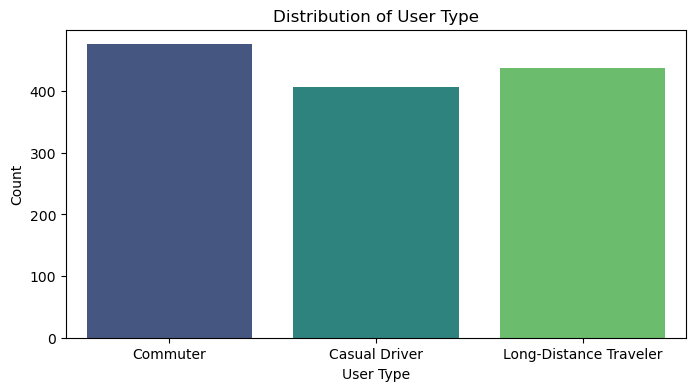

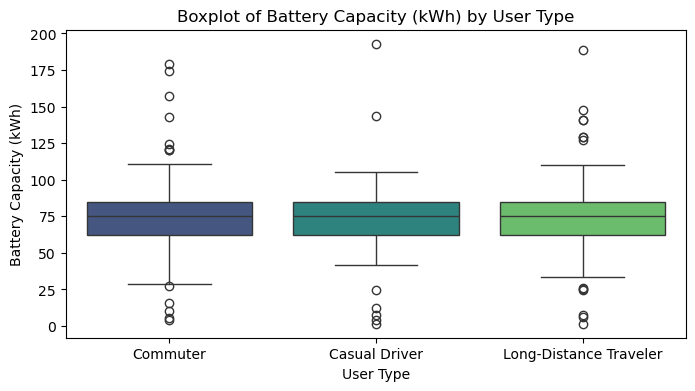

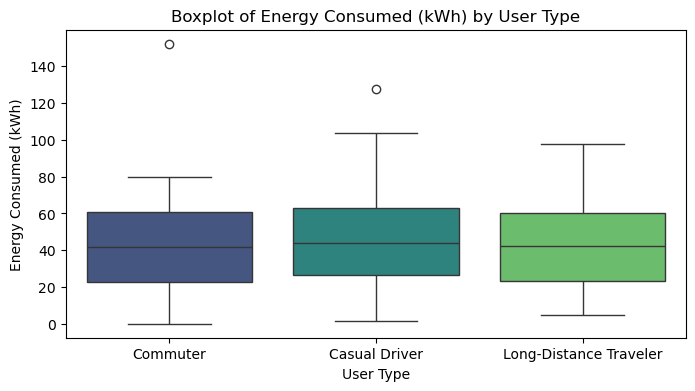

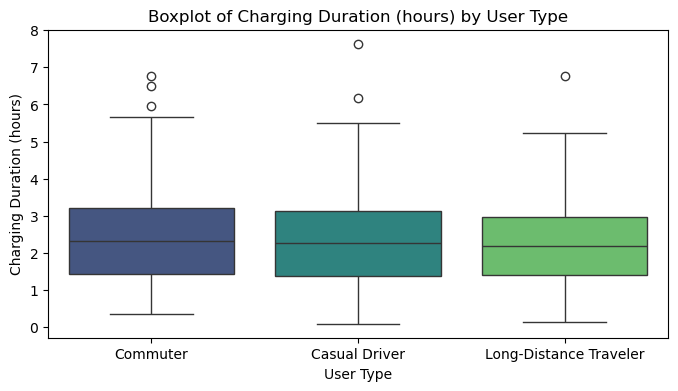

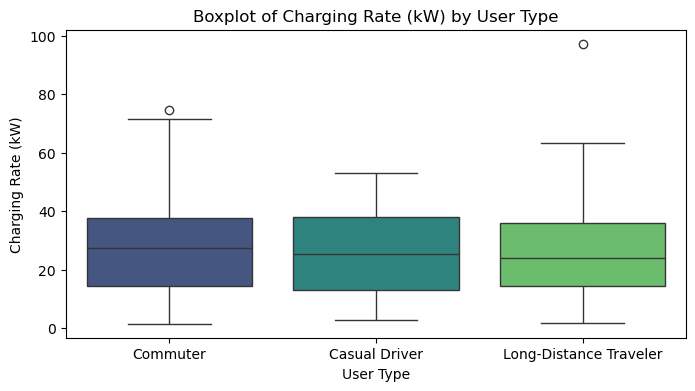

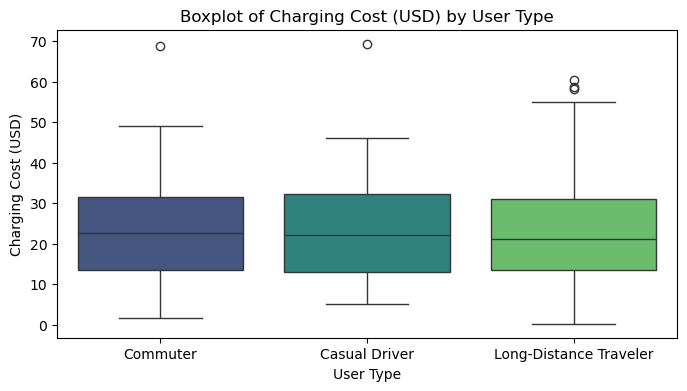

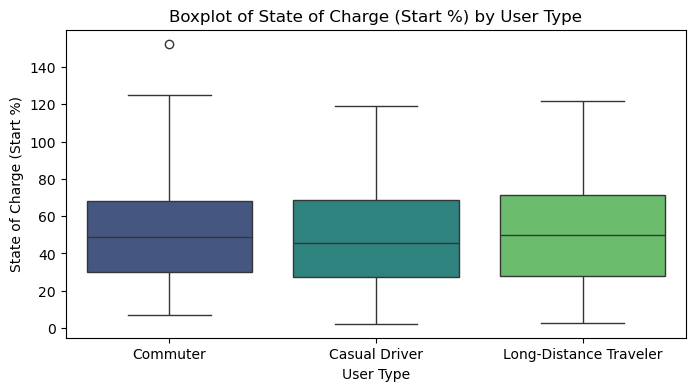

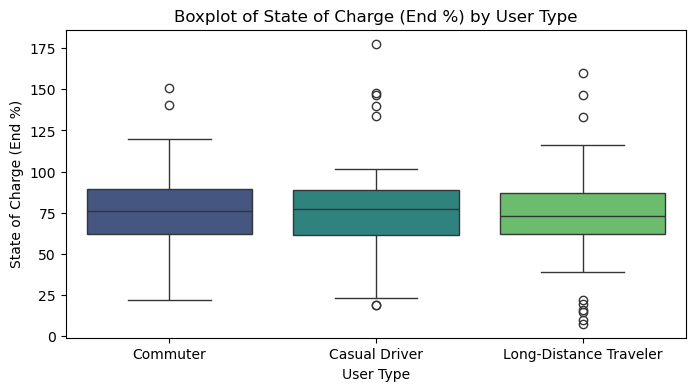

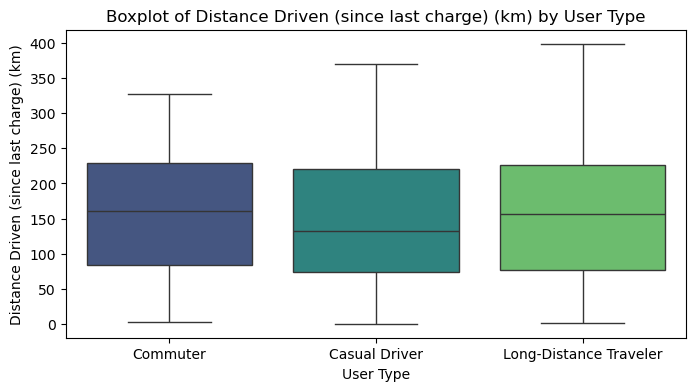

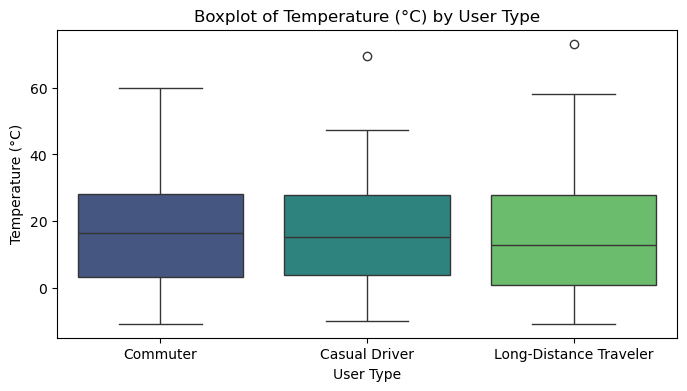

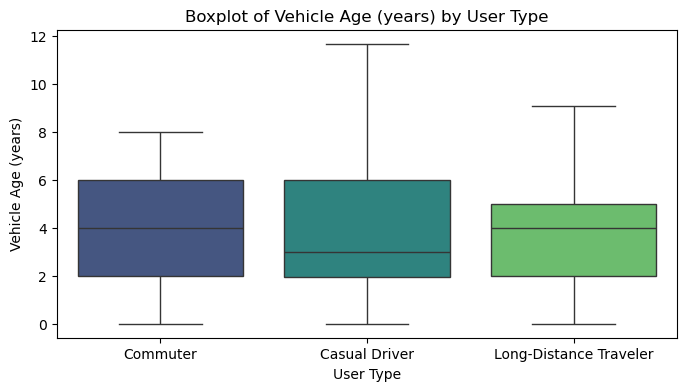

In [ ]:
# Visualize the distribution of the target variable (User Type) /  H√¨nh dung s·ª± ph√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u (Ki·ªÉu ng∆∞·ªùi d√πng)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='User Type', hue='User Type', palette='viridis', legend=False)
plt.title("Distribution of User Type")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.show()

# Visualize the relationship between numerical features and the target variable /  H√¨nh dung m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c ƒëi·ªÉm s·ªë v√† bi·∫øn m·ª•c ti√™u
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='User Type', y=column, hue='User Type', palette='viridis', legend=False)
    plt.title(f"Boxplot of {column} by User Type")
    plt.xlabel("User Type")
    plt.ylabel(column)
    plt.show()

# Visualize feature importance using SHAP values (placeholder for later integration) / H√¨nh dung t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng b·∫±ng c√°ch s·ª≠ d·ª•ng gi√° tr·ªã SHAP (ch·ªó gi·ªØ ch·ªó ƒë·ªÉ t√≠ch h·ª£p sau).
# Note: SHAP values will be calculated after model training in a later section. / L∆∞u √Ω: Gi√° tr·ªã SHAP s·∫Ω ƒë∆∞·ª£c t√≠nh to√°n sau khi ƒë√†o t·∫°o m√¥ h√¨nh trong ph·∫ßn sau.


# Feature Engineering / K·ªπ thu·∫≠t t√≠nh nƒÉng
Create new features such as 'hour', 'day_of_week', 'is_weekend', and calculate the distance between charging sessions. / T·∫°o c√°c t√≠nh nƒÉng m·ªõi nh∆∞ 'gi·ªù', 'ng√†y_trong_tu·∫ßn', 'l√†_cu·ªëi_tu·∫ßn' v√† t√≠nh to√°n kho·∫£ng c√°ch gi·ªØa c√°c phi√™n s·∫°c.

Columns in the dataset:
Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (¬∞C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

New features added to the dataset:
   hour  day_of_week  is_weekend Distance Between Charges
0     0            0           0                     None
1     1            0           0                     None
2     2            0           0                     None
3     3            0           0                     None
4     4            0           0                     None


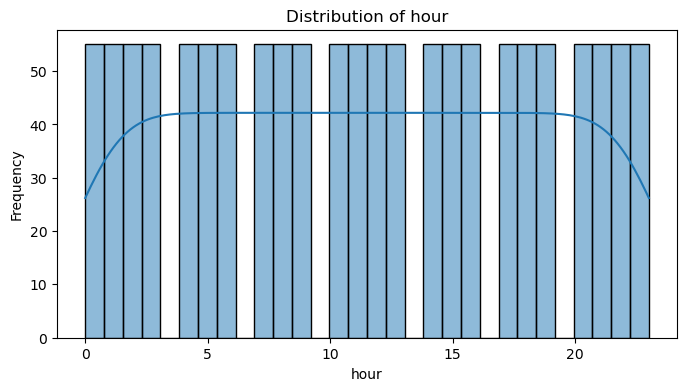

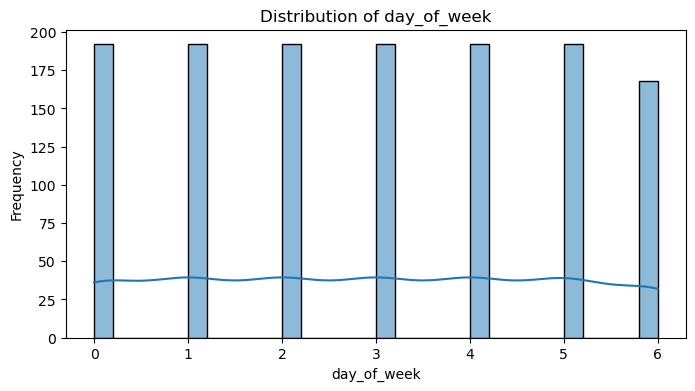

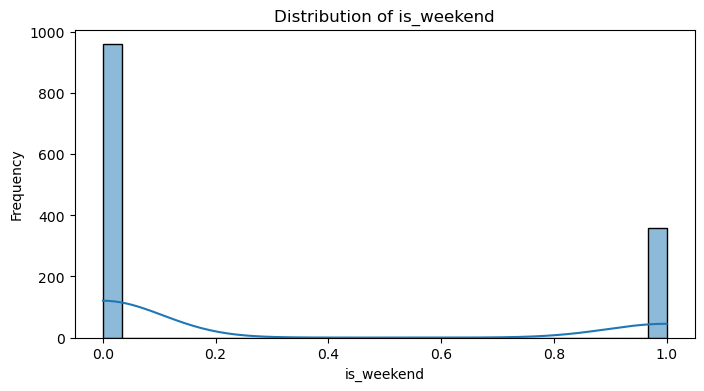

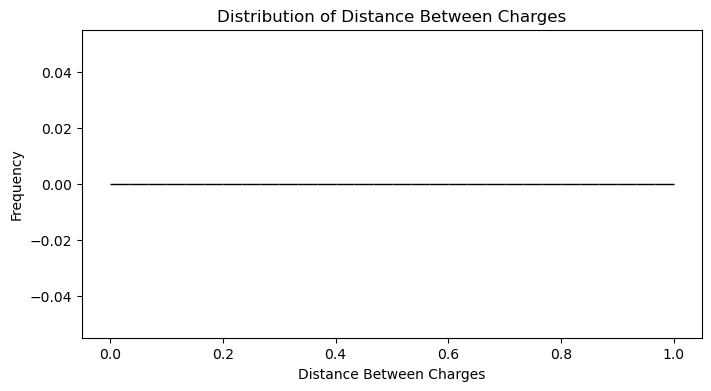

In [ ]:
# Inspect the dataset columns / Ki·ªÉm tra c√°c c·ªôt t·∫≠p d·ªØ li·ªáu
print("Columns in the dataset:")
print(df.columns)

# Extract hour, day_of_week, and is_weekend from 'Charging Start Time' / Tr√≠ch xu·∫•t gi·ªù, ng√†y_trong_tu·∫ßn v√† is_weekend t·ª´ 'Th·ªùi gian b·∫Øt ƒë·∫ßu s·∫°c'
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'], errors='coerce')  # Convert to datetime / Chuy·ªÉn ƒë·ªïi sang datetime
df['hour'] = df['Charging Start Time'].dt.hour
df['day_of_week'] = df['Charging Start Time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Check if 'Distance Driven' exists / Ki·ªÉm tra xem 'Distance Driven' c√≥ t·ªìn t·∫°i kh√¥ng
if 'Distance Driven' in df.columns:
    # Check if 'Vehicle ID' exists / Ki·ªÉm tra xem 'Vehicle ID' c√≥ t·ªìn t·∫°i kh√¥ng
    if 'Vehicle ID' in df.columns:
        # Calculate the distance between charging sessions grouped by 'Vehicle ID' / T√≠nh to√°n kho·∫£ng c√°ch gi·ªØa c√°c phi√™n s·∫°c ƒë∆∞·ª£c nh√≥m theo 'ID xe'
        df = df.sort_values(by=['Vehicle ID', 'Charging Start Time'])  # Sort by Vehicle ID and time / S·∫Øp x·∫øp theo ID xe v√† th·ªùi gian
        df['Distance Between Charges'] = df.groupby('Vehicle ID')['Distance Driven'].diff().fillna(0)
    else:
        print("Warning: 'Vehicle ID' column not found. Calculating distance without grouping.")
        # Calculate the distance without grouping
        df = df.sort_values(by=['Charging Start Time'])  # Sort by time only / Ch·ªâ s·∫Øp x·∫øp theo th·ªùi gian
        df['Distance Between Charges'] = df['Distance Driven'].diff().fillna(0)
else:
    print("Warning: 'Distance Driven' column not found. Skipping distance calculation.")
    df['Distance Between Charges'] = None  # Add a placeholder column / Th√™m m·ªôt c·ªôt gi·ªØ ch·ªó

# Inspect the new features
print("\nNew features added to the dataset:")
print(df[['hour', 'day_of_week', 'is_weekend', 'Distance Between Charges']].head())

# Visualize the distribution of the new features
new_features = ['hour', 'day_of_week', 'is_weekend', 'Distance Between Charges']

for feature in new_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

# Handling missing values ‚Äã‚Äã/  X·ª≠ l√Ω c√°c gi√° tr·ªã b·ªã thi·∫øu ‚Äã‚Äã
Imputate missing values ‚Äã‚Äãusing KNN Imputer or represent averages for numeric features. / G√°n c√°c gi√° tr·ªã b·ªã thi·∫øu ‚Äã‚Äãb·∫±ng c√°ch s·ª≠ d·ª•ng KNN Imputer ho·∫∑c bi·ªÉu di·ªÖn c√°c gi√° tr·ªã trung b√¨nh cho c√°c t√≠nh nƒÉng s·ªë.

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np

# Identify numerical columns / X√°c ƒë·ªãnh c√°c c·ªôt s·ªë
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize KNN Imputer / Kh·ªüi t·∫°o KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputer to numerical columns / √Åp d·ª•ng KNN Imputer v√†o c√°c c·ªôt s·ªë
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])

# For columns with extreme outliers, use median imputation as a fallback /  ƒê·ªëi v·ªõi c√°c c·ªôt c√≥ gi√° tr·ªã ngo·∫°i l·ªá c·ª±c ƒë·∫°i, h√£y s·ª≠ d·ª•ng ph√©p quy ∆∞·ªõc trung b√¨nh l√†m ph∆∞∆°ng √°n d·ª± ph√≤ng
for column in numerical_columns:
    if df[column].isnull().sum() > 0:  # Check if any missing values remain / Ki·ªÉm tra xem c√≤n thi·∫øu gi√° tr·ªã n√†o kh√¥ng
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

# Verify that there are no missing values left / X√°c minh r·∫±ng kh√¥ng c√≤n gi√° tr·ªã n√†o b·ªã thi·∫øu
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
User ID                                        0
Vehicle Model                                  0
Battery Capacity (kWh)                         0
Charging Station ID                            0
Charging Station Location                      0
Charging Start Time                            0
Charging End Time                              0
Energy Consumed (kWh)                          0
Charging Duration (hours)                      0
Charging Rate (kW)                             0
Charging Cost (USD)                            0
Time of Day                                    0
Day of Week                                    0
State of Charge (Start %)                      0
State of Charge (End %)                        0
Distance Driven (since last charge) (km)       0
Temperature (¬∞C)                               0
Vehicle Age (years)                            0
Charger Type                                   0
User Type                         

# Encode Categorical Variables / M√£ h√≥a bi·∫øn ph√¢n lo·∫°i
Use Target Encoding for Logistic Regression and allow CatBoost to handle categorical variables natively. / S·ª≠ d·ª•ng Target Encoding cho Logistic Regression v√† cho ph√©p CatBoost x·ª≠ l√Ω c√°c bi·∫øn ph√¢n lo·∫°i theo c√°ch g·ªëc.

In [ ]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable / C√°c t√≠nh nƒÉng ri√™ng bi·ªát v√† bi·∫øn m·ª•c ti√™u
X = df.drop(columns=["User Type"])
y = df["User Type"]

# Identify categorical columns / X√°c ƒë·ªãnh c√°c c·ªôt danh m·ª•c
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode target variable for Logistic Regression / M√£ h√≥a bi·∫øn m·ª•c ti√™u cho H·ªìi quy Logistic
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply Target Encoding for Logistic Regression / √Åp d·ª•ng M√£ h√≥a M·ª•c ti√™u cho H·ªìi quy Logistic
target_encoder = TargetEncoder(cols=categorical_columns)
X_encoded_logistic = target_encoder.fit_transform(X, y_encoded)

# For CatBoost, categorical columns can be used directly / ƒê·ªëi v·ªõi CatBoost, c√°c c·ªôt danh m·ª•c c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng tr·ª±c ti·∫øp
X_encoded_catboost = X.copy()

# Verify the encoded datasets / X√°c minh c√°c t·∫≠p d·ªØ li·ªáu ƒë∆∞·ª£c m√£ h√≥a
print("\nTarget Encoded Dataset for Logistic Regression:")
print(X_encoded_logistic.head())

print("\nDataset for CatBoost (categorical columns kept as is):")
print(X_encoded_catboost.head())


Target Encoded Dataset for Logistic Regression:
    User ID  Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
0  1.019770       1.003876              108.463007             1.055066   
1  0.889662       1.018797              100.000000             0.967728   
2  1.019770       1.074219               75.000000             1.018231   
3  1.149879       1.018797               50.000000             1.018910   
4  1.149879       1.018797               50.000000             1.072549   

   Charging Station Location Charging Start Time  Charging End Time  \
0                   1.057252 2024-01-01 00:00:00           1.019770   
1                   1.007576 2024-01-01 01:00:00           0.889662   
2                   1.007576 2024-01-01 02:00:00           1.019770   
3                   1.057252 2024-01-01 03:00:00           1.149879   
4                   1.067340 2024-01-01 04:00:00           1.149879   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  

# Data Normalization / Chu·∫©n h√≥a d·ªØ li·ªáu
Normalize numerical features using StandardScaler or MinMaxScaler for Logistic Regression. / Chu·∫©n h√≥a c√°c t√≠nh nƒÉng s·ªë b·∫±ng StandardScaler ho·∫∑c MinMaxScaler cho h·ªìi quy logistic.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns / X√°c ƒë·ªãnh c√°c c·ªôt s·ªë
numerical_columns = X_encoded_logistic.select_dtypes(include=['float64', 'int64']).columns

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler for Logistic Regression / √Åp d·ª•ng StandardScaler cho h·ªìi quy logistic
X_standard_scaled = X_encoded_logistic.copy()
X_standard_scaled[numerical_columns] = standard_scaler.fit_transform(X_standard_scaled[numerical_columns])

# Apply MinMaxScaler for Logistic Regression (optional, if needed) /  √Åp d·ª•ng MinMaxScaler cho h·ªìi quy logistic (t√πy ch·ªçn, n·∫øu c·∫ßn)
X_minmax_scaled = X_encoded_logistic.copy()
X_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(X_minmax_scaled[numerical_columns])

# Verify the normalized datasets / X√°c minh c√°c t·∫≠p d·ªØ li·ªáu ƒë√£ chu·∫©n h√≥a
print("\nDataset normalized using StandardScaler:")
print(X_standard_scaled.head())

print("\nDataset normalized using MinMaxScaler:")
print(X_minmax_scaled.head())


Dataset normalized using StandardScaler:
    User ID  Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
0 -0.028434      -0.600676                1.645480             0.437525   
1 -1.279532      -0.125234                1.235035            -0.755758   
2 -0.028434       1.640718                0.022567            -0.065743   
3  1.222664      -0.125234               -1.189901            -0.056479   
4  1.222664      -0.125234               -1.189901             0.676389   

   Charging Station Location Charging Start Time  Charging End Time  \
0                   0.912566 2024-01-01 00:00:00          -0.028540   
1                  -0.400490 2024-01-01 01:00:00          -1.282402   
2                  -0.400490 2024-01-01 02:00:00          -0.028540   
3                   0.912566 2024-01-01 03:00:00           1.225322   
4                   1.179220 2024-01-01 04:00:00           1.225322   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  ...  \


# Train-Test Split / Ph√¢n t√°ch Train-Test
Split the dataset into training and testing sets using an 80-20 split. / Chia t·∫≠p d·ªØ li·ªáu th√†nh c√°c t·∫≠p hu·∫•n luy·ªán v√† th·ª≠ nghi·ªám b·∫±ng c√°ch s·ª≠ d·ª•ng ph√¢n t√°ch 80-20.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80-20 split)/ Chia t·∫≠p d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra (chia 80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_standard_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Verify the shapes of the resulting datasets / X√°c minh h√¨nh d·∫°ng c·ªßa c√°c t·∫≠p d·ªØ li·ªáu k·∫øt qu·∫£
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1056, 23)
Shape of X_test: (264, 23)
Shape of y_train: (1056,)
Shape of y_test: (264,)


# Check Label Imbalance / Ki·ªÉm tra s·ª± m·∫•t c√¢n b·∫±ng nh√£n


üìä Ph√¢n b·ªë nh√£n User Type:
User Type
Commuter                  0.360606
Long-Distance Traveler    0.331061
Casual Driver             0.308333
Name: proportion, dtype: float64


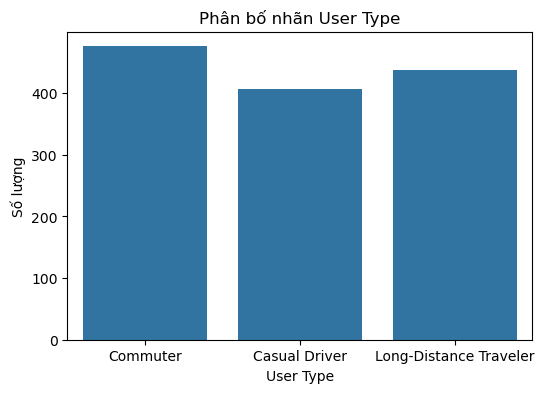

In [81]:
# Ki·ªÉm tra Label Imbalance
print("üìä Ph√¢n b·ªë nh√£n User Type:")
print(df['User Type'].value_counts(normalize=True))

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë nh√£n
plt.figure(figsize=(6, 4))
sns.countplot(x='User Type', data=df)
plt.title("Ph√¢n b·ªë nh√£n User Type")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.show()

# Build Pipelines / X√¢y d·ª±ng ƒë∆∞·ªùng ·ªëng
Create pipelines for preprocessing and model training for both Logistic Regression and CatBoost. / T·∫°o ƒë∆∞·ªùng ·ªëng ƒë·ªÉ x·ª≠ l√Ω tr∆∞·ªõc v√† ƒë√†o t·∫°o m√¥ h√¨nh cho c·∫£ Logistic Regression v√† CatBoost.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets / Chia t·∫≠p d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for Logistic Regression / ƒê∆∞·ªùng ·ªëng cho h·ªìi quy logistic
logistic_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize the data / Chu·∫©n h√≥a d·ªØ li·ªáu
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Hyperparameter grid for Logistic Regression / L∆∞·ªõi si√™u tham s·ªë cho h·ªìi quy logistic
logistic_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']  # Choose solvers compatible with l1/l2 / Ch·ªçn b·ªô gi·∫£i t∆∞∆°ng th√≠ch v·ªõi l1/l2
}

# GridSearchCV for Logistic Regression / GridSearchCV cho h·ªìi quy logistic
logistic_grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=logistic_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Fit Logistic Regression / Ph√π h·ª£p v·ªõi h·ªìi quy logistic
logistic_grid_search.fit(X_train, y_train)

# Best results for Logistic Regression / K·∫øt qu·∫£ t·ªët nh·∫•t cho h·ªìi quy logistic
print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best F1-score for Logistic Regression:", logistic_grid_search.best_score_)

# GridSearchCV for CatBoost (no pipeline needed) / GridSearchCV cho CatBoost (kh√¥ng c·∫ßn pipeline)
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Hyperparameter grid for CatBoost / L∆∞·ªõi si√™u tham s·ªë cho CatBoost
catboost_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# GridSearchCV for CatBoost
catboost_grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=catboost_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Fit CatBoost / Ph√π h·ª£p v·ªõi CatBoost
catboost_grid_search.fit(X_train, y_train)

# Best results for CatBoost / K·∫øt qu·∫£ t·ªët nh·∫•t cho CatBoost
print("Best parameters for CatBoost:", catboost_grid_search.best_params_)
print("Best F1-score for CatBoost:", catboost_grid_search.best_score_)


Best parameters for Logistic Regression: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best F1-score for Logistic Regression: 0.9572885078457833


c:\Users\007mk\anaconda3\envs\gis\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\007mk\anaconda3\envs\gis\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\007mk\anaconda3\envs\gis\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\007mk\anaconda3\envs\gis\Lib\sit

Best parameters for CatBoost: {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best F1-score for CatBoost: 0.9493370051574386


# Logistic Regression Pipeline / ƒê∆∞·ªùng ·ªëng h·ªìi quy logistic
Build a pipeline that includes Target Encoding, normalization, and Logistic Regression. / X√¢y d·ª±ng ƒë∆∞·ªùng ·ªëng bao g·ªìm M√£ h√≥a m·ª•c ti√™u, chu·∫©n h√≥a v√† H·ªìi quy logistic.

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # D·ªØ li·ªáu m·∫´u, b·∫°n c√≥ th·ªÉ thay b·∫±ng dataset c·ªßa m√¨nh

# Load dataset
data = load_iris()  # Thay th·∫ø b·∫±ng dataset th·ª±c t·∫ø c·ªßa b·∫°n
X, y = data.data, data.target  # X l√† ƒë·∫∑c tr∆∞ng, y l√† nh√£n

# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline for Logistic Regression
logistic_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Chu·∫©n h√≥a ƒë·∫∑c tr∆∞ng s·ªë
    ('model', LogisticRegression(random_state=42, max_iter=1000))  # M√¥ h√¨nh Logistic Regression
])

# Define hyperparameter grid for Logistic Regression
logistic_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],  # H·ªá s·ªë ƒëi·ªÅu chu·∫©n
    'model__penalty': ['l1', 'l2'],  # Lo·∫°i ƒëi·ªÅu chu·∫©n
    'model__solver': ['liblinear', 'saga']  # C√°c solver h·ªó tr·ª£ l1 v√† l2
}

# Perform GridSearchCV for Logistic Regression
logistic_grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=logistic_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1_weighted',  # S·ª≠ d·ª•ng F1-score ƒë·ªÉ ƒë√°nh gi√°
    n_jobs=-1  # S·ª≠ d·ª•ng t·∫•t c·∫£ c√°c l√µi CPU c√≥ s·∫µn
)

# Fit Logistic Regression pipeline
logistic_grid_search.fit(X_train, y_train)

# Best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best F1-score for Logistic Regression:", logistic_grid_search.best_score_)


Best parameters for Logistic Regression: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best F1-score for Logistic Regression: 0.9572885078457833


# CatBoost Pipeline / ƒê∆∞·ªùng ·ªëng CatBoost
Build a pipeline for CatBoost that handles categorical variables and numerical preprocessing. / X√¢y d·ª±ng m·ªôt pipeline cho CatBoost ƒë·ªÉ x·ª≠ l√Ω c√°c bi·∫øn ph√¢n lo·∫°i v√† ti·ªÅn x·ª≠ l√Ω s·ªë.

In [ ]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define pipeline for CatBoost
catboost_pipeline = Pipeline(steps=[
    ('model', CatBoostClassifier(random_state=42, verbose=0))  # CatBoost model
])

# Define hyperparameter grid for CatBoost
catboost_param_grid = {
    'model__iterations': [100, 200, 300],  # Number of boosting iterations
    'model__depth': [4, 6, 8],  # Depth of the tree
    'model__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'model__l2_leaf_reg': [1, 3, 5]  # L2 regularization
}

# Perform GridSearchCV for CatBoost /  Th·ª±c hi·ªán GridSearchCV cho CatBoost
catboost_grid_search = GridSearchCV(
    estimator=catboost_pipeline,
    param_grid=catboost_param_grid,
    cv=5,  # 5-fold cross-validation / X√°c th·ª±c ch√©o 5 l·∫ßn
    scoring='f1_weighted',  # Use F1-score for evaluation / # S·ª≠ d·ª•ng ƒëi·ªÉm F1 ƒë·ªÉ ƒë√°nh gi√°
    n_jobs=-1  # Use all available cores / S·ª≠ d·ª•ng t·∫•t c·∫£ c√°c l√µi c√≥ s·∫µn
)

# Fit CatBoost pipeline
catboost_grid_search.fit(X_train, y_train)

# Best parameters and score for CatBoost
print("Best parameters for CatBoost:", catboost_grid_search.best_params_)
print("Best F1-score for CatBoost:", catboost_grid_search.best_score_)

Best parameters for CatBoost: {'model__depth': 4, 'model__iterations': 300, 'model__l2_leaf_reg': 1, 'model__learning_rate': 0.01}
Best F1-score for CatBoost: 0.9493370051574386


# Model Training / ƒê√†o t·∫°o m√¥ h√¨nh
Train both Logistic Regression and CatBoost models using cross-validation to avoid overfitting. / ƒê√†o t·∫°o c·∫£ m√¥ h√¨nh Logistic Regression v√† CatBoost b·∫±ng c√°ch s·ª≠ d·ª•ng x√°c th·ª±c ch√©o ƒë·ªÉ tr√°nh qu√° kh·ªõp.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# Train Logistic Regression with cross-validation / ƒê√†o t·∫°o h·ªìi quy logistic v·ªõi x√°c th·ª±c ch√©o
logistic_cv_scores = cross_val_score(
    logistic_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='f1_weighted'
)
print("Cross-validated F1-scores for Logistic Regression:", logistic_cv_scores)
print("Mean F1-score for Logistic Regression:", logistic_cv_scores.mean())

# Train CatBoost with cross-validation / ƒê√†o t·∫°o CatBoost v·ªõi x√°c th·ª±c ch√©o
catboost_cv_scores = cross_val_score(
    catboost_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='f1_weighted'
)
print("Cross-validated F1-scores for CatBoost:", catboost_cv_scores)
print("Mean F1-score for CatBoost:", catboost_cv_scores.mean())

# Evaluate Logistic Regression on the test set / ƒê√°nh gi√° h·ªìi quy logistic tr√™n t·∫≠p ki·ªÉm tra
logistic_test_predictions = logistic_grid_search.best_estimator_.predict(X_test)
logistic_test_f1 = f1_score(y_test, logistic_test_predictions, average='weighted')
print("Test F1-score for Logistic Regression:", logistic_test_f1)

# Evaluate CatBoost on the test set / ƒê√°nh gi√° CatBoost tr√™n b·ªô th·ª≠ nghi·ªám
catboost_test_predictions = catboost_grid_search.best_estimator_.predict(X_test)
catboost_test_f1 = f1_score(y_test, catboost_test_predictions, average='weighted')
print("Test F1-score for CatBoost:", catboost_test_f1)

Cross-validated F1-scores for Logistic Regression: [0.95782726 1.         0.87044534 1.         0.95816993]
Mean F1-score for Logistic Regression: 0.9572885078457833
Cross-validated F1-scores for CatBoost: [0.95782726 1.         0.83068783 1.         0.95816993]
Mean F1-score for CatBoost: 0.9493370051574386
Test F1-score for Logistic Regression: 1.0
Test F1-score for CatBoost: 1.0


# Logistic Regression with Cross-Validation / H·ªìi quy logistic v·ªõi ki·ªÉm tra ch√©o
Train Logistic Regression using K-Fold cross-validation and evaluate mean performance. / Hu·∫•n luy·ªán h·ªìi quy logistic b·∫±ng c√°ch s·ª≠ d·ª•ng ki·ªÉm tra ch√©o K-Fold v√† ƒë√°nh gi√° hi·ªáu su·∫•t trung b√¨nh.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# Train Logistic Regression with cross-validation / ƒê√†o t·∫°o h·ªìi quy logistic v·ªõi x√°c th·ª±c ch√©o
logistic_cv_scores = cross_val_score(
    logistic_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='f1_weighted'
)
print("Cross-validated F1-scores for Logistic Regression:", logistic_cv_scores)
print("Mean F1-score for Logistic Regression:", logistic_cv_scores.mean())

Cross-validated F1-scores for Logistic Regression: [0.95782726 1.         0.87044534 1.         0.95816993]
Mean F1-score for Logistic Regression: 0.9572885078457833


# CatBoost with Cross-Validation / CatBoost v·ªõi Cross-Validation
Train CatBoost using K-Fold cross-validation and evaluate mean performance. / Hu·∫•n luy·ªán CatBoost b·∫±ng c√°ch s·ª≠ d·ª•ng K-Fold cross-validation v√† ƒë√°nh gi√° hi·ªáu su·∫•t trung b√¨nh.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score

# Initialize K-Fold cross-validation / Kh·ªüi t·∫°o x√°c th·ª±c ch√©o K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train CatBoost with K-Fold cross-validation / ƒê√†o t·∫°o CatBoost v·ªõi x√°c th·ª±c ch√©o K-Fold
catboost_cv_scores = cross_val_score(
    catboost_grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='f1_weighted'
)

# Print cross-validated F1-scores and mean performance / In ƒëi·ªÉm F1 ƒë∆∞·ª£c x√°c th·ª±c ch√©o v√† hi·ªáu su·∫•t trung b√¨nh
print("Cross-validated F1-scores for CatBoost:", catboost_cv_scores)
print("Mean F1-score for CatBoost:", catboost_cv_scores.mean())

Cross-validated F1-scores for CatBoost: [0.91944444 0.95846233 0.91904762 0.87412281 1.        ]
Mean F1-score for CatBoost: 0.9342154405621897


# Model Testing / Ki·ªÉm tra m√¥ h√¨nh
Evaluate the trained models on the test set to assess their performance. / ƒê√°nh gi√° c√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c ƒë√†o t·∫°o tr√™n b·ªô th·ª≠ nghi·ªám ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t c·ªßa ch√∫ng.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Evaluate Logistic Regression on the test set / ƒê√°nh gi√° h·ªìi quy logistic tr√™n t·∫≠p ki·ªÉm tra
logistic_test_predictions = logistic_grid_search.best_estimator_.predict(X_test)
logistic_test_accuracy = accuracy_score(y_test, logistic_test_predictions)
logistic_test_precision = precision_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_recall = recall_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_f1 = f1_score(y_test, logistic_test_predictions, average='weighted')

print("Logistic Regression Test Set Evaluation:")
print("Accuracy:", logistic_test_accuracy)
print("Precision:", logistic_test_precision)
print("Recall:", logistic_test_recall)
print("F1-score:", logistic_test_f1)
print("\nClassification Report:")
print(classification_report(y_test, logistic_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, logistic_test_predictions))

# Evaluate CatBoost on the test set / ƒê√°nh gi√° CatBoost tr√™n b·ªô th·ª≠ nghi·ªám
catboost_test_predictions = catboost_grid_search.best_estimator_.predict(X_test)
catboost_test_accuracy = accuracy_score(y_test, catboost_test_predictions)
catboost_test_precision = precision_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_recall = recall_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_f1 = f1_score(y_test, catboost_test_predictions, average='weighted')

print("\nCatBoost Test Set Evaluation:")
print("Accuracy:", catboost_test_accuracy)
print("Precision:", catboost_test_precision)
print("Recall:", catboost_test_recall)
print("F1-score:", catboost_test_f1)
print("\nClassification Report:")
print(classification_report(y_test, catboost_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, catboost_test_predictions))

Logistic Regression Test Set Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

CatBoost Test Set Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighte

# Evaluate Logistic Regression / ƒê√°nh gi√° h·ªìi quy logistic
Evaluate Logistic Regression using metrics like accuracy, precision, recall, and F1-score. / ƒê√°nh gi√° h·ªìi quy logistic b·∫±ng c√°c s·ªë li·ªáu nh∆∞ ƒë·ªô ch√≠nh x√°c, ƒë·ªô ch√≠nh x√°c, ƒë·ªô thu h·ªìi v√† ƒëi·ªÉm F1.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate Logistic Regression on the test set / ƒê√°nh gi√° h·ªìi quy logistic tr√™n t·∫≠p ki·ªÉm tra
logistic_test_predictions = logistic_grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics / T√≠nh to√°n s·ªë li·ªáu ƒë√°nh gi√°
logistic_test_accuracy = accuracy_score(y_test, logistic_test_predictions)
logistic_test_precision = precision_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_recall = recall_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_f1 = f1_score(y_test, logistic_test_predictions, average='weighted')

# Print evaluation results / In k·∫øt qu·∫£ ƒë√°nh gi√°
print("Logistic Regression Test Set Evaluation:")
print(f"Accuracy: {logistic_test_accuracy:.4f}")
print(f"Precision: {logistic_test_precision:.4f}")
print(f"Recall: {logistic_test_recall:.4f}")
print(f"F1-score: {logistic_test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logistic_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, logistic_test_predictions))

Logistic Regression Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Evaluate CatBoost / ƒê√°nh gi√° CatBoost
Evaluate CatBoost using metrics like accuracy, precision, recall, and F1-score. / ƒê√°nh gi√° CatBoost b·∫±ng c√°c s·ªë li·ªáu nh∆∞ ƒë·ªô ch√≠nh x√°c, ƒë·ªô ch√≠nh x√°c, kh·∫£ nƒÉng thu h·ªìi v√† ƒëi·ªÉm F1.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate CatBoost on the test set / ƒê√°nh gi√° CatBoost tr√™n b·ªô th·ª≠ nghi·ªám
catboost_test_predictions = catboost_grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics / T√≠nh to√°n s·ªë li·ªáu ƒë√°nh gi√°
catboost_test_accuracy = accuracy_score(y_test, catboost_test_predictions)
catboost_test_precision = precision_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_recall = recall_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_f1 = f1_score(y_test, catboost_test_predictions, average='weighted')

# Print evaluation results / In k·∫øt qu·∫£ ƒë√°nh gi√°
print("CatBoost Test Set Evaluation:")
print(f"Accuracy: {catboost_test_accuracy:.4f}")
print(f"Precision: {catboost_test_precision:.4f}")
print(f"Recall: {catboost_test_recall:.4f}")
print(f"F1-score: {catboost_test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, catboost_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, catboost_test_predictions))

CatBoost Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Model Optimization / T·ªëi ∆∞u h√≥a m√¥ h√¨nh
Optimize hyperparameters for both Logistic Regression and CatBoost using GridSearchCV or Optuna. / T·ªëi ∆∞u h√≥a si√™u tham s·ªë cho c·∫£ Logistic Regression v√† CatBoost b·∫±ng GridSearchCV ho·∫∑c Optuna.

In [ ]:
pip install optuna-integration

import optuna
from optuna.integration import OptunaSearchCV

# Define objective function for Logistic Regression optimization /X√°c ƒë·ªãnh h√†m m·ª•c ti√™u cho t·ªëi ∆∞u h√≥a h·ªìi quy logistic
def objective_logistic(trial):
    # Define hyperparameters to tune / X√°c ƒë·ªãnh si√™u tham s·ªë ƒë·ªÉ ƒëi·ªÅu ch·ªânh
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'saga'

    # Create Logistic Regression model / T·∫°o m√¥ h√¨nh h·ªìi quy logistic
    model = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=1000)
    
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    return scores.mean()

# Optimize Logistic Regression hyperparameters using Optuna / T·ªëi ∆∞u h√≥a si√™u tham s·ªë h·ªìi quy logistic b·∫±ng Optuna
logistic_study = optuna.create_study(direction='maximize')
logistic_study.optimize(objective_logistic, n_trials=50)

# Best parameters and score for Logistic Regression / C√°c th√¥ng s·ªë v√† ƒëi·ªÉm s·ªë t·ªët nh·∫•t cho h·ªìi quy logistic
print("Best parameters for Logistic Regression (Optuna):", logistic_study.best_params)
print("Best F1-score for Logistic Regression (Optuna):", logistic_study.best_value)

# Define objective function for CatBoost optimization /X√°c ƒë·ªãnh h√†m m·ª•c ti√™u cho t·ªëi ∆∞u h√≥a CatBoost
def objective_catboost(trial):
    # Define hyperparameters to tune / X√°c ƒë·ªãnh si√™u tham s·ªë ƒë·ªÉ ƒëi·ªÅu ch·ªânh
    iterations = trial.suggest_int('iterations', 100, 500)
    depth = trial.suggest_int('depth', 4, 10)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.3)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)

    # Create CatBoost model / T·∫°o m√¥ h√¨nh CatBoost
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        random_state=42,
        verbose=0
    )
    
    # Perform cross-validation / Th·ª±c hi·ªán x√°c th·ª±c ch√©o
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    return scores.mean()

# Optimize CatBoost hyperparameters using Optuna / T·ªëi ∆∞u h√≥a si√™u tham s·ªë CatBoost b·∫±ng Optuna
catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(objective_catboost, n_trials=50)

# Best parameters and score for CatBoost / Th√¥ng s·ªë v√† ƒëi·ªÉm s·ªë t·ªët nh·∫•t cho CatBoost
print("Best parameters for CatBoost (Optuna):", catboost_study.best_params)
print("Best F1-score for CatBoost (Optuna):", catboost_study.best_value)

[I 2025-04-12 20:16:54,716] A new study created in memory with name: no-name-02919322-494f-44dd-9345-c8a6af176aed


C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3929140637.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2025-04-12 20:16:54,899] Trial 0 finished with value: 0.9490563890873489 and parameters: {'C': 0.7003578950319413, 'penalty': 'l1'}. Best is trial 0 with value: 0.9490563890873489.
C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3929140637.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2025-04-12 20:16:55,025] Trial 1 finished with value: 0.8156956115779647 and parameters: {'C': 0.004453740227647317, 'penalty': 'l2'}. Best is trial 0 with value: 0.949056389087

Best parameters for Logistic Regression (Optuna): {'C': 0.3617494006376381, 'penalty': 'l2'}
Best F1-score for Logistic Regression (Optuna): 0.9657230557540155


[I 2025-04-12 20:17:12,659] Trial 0 finished with value: 0.9413693736603953 and parameters: {'iterations': 197, 'depth': 9, 'learning_rate': 0.001740574603508758, 'l2_leaf_reg': 1.7434451813437528}. Best is trial 0 with value: 0.9413693736603953.
C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3929140637.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.3)
C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3929140637.py:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)
[I 2025-04-12 20:17:16,601] Trial 1 finished with value: 0.9409709920855432

Best parameters for CatBoost (Optuna): {'iterations': 120, 'depth': 10, 'learning_rate': 0.005600206504262981, 'l2_leaf_reg': 1.0312785443742918}
Best F1-score for CatBoost (Optuna): 0.9493370051574386


# Hyperparameter Tuning for Logistic Regression / ƒêi·ªÅu ch·ªânh si√™u tham s·ªë cho h·ªìi quy logistic
Perform hyperparameter tuning for Logistic Regression to improve performance. / Th·ª±c hi·ªán ƒëi·ªÅu ch·ªânh si√™u tham s·ªë cho h·ªìi quy logistic ƒë·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define pipeline for Logistic Regression / X√°c ƒë·ªãnh ƒë∆∞·ªùng ·ªëng cho h·ªìi quy logistic
logistic_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize numerical features / Chu·∫©n h√≥a c√°c t√≠nh nƒÉng s·ªë
    ('model', LogisticRegression(random_state=42, max_iter=1000))  # Logistic Regression model
])

# Define hyperparameter grid for Logistic Regression / X√°c ƒë·ªãnh l∆∞·ªõi si√™u tham s·ªë cho h·ªìi quy logistic
logistic_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],  # Regularization strength / S·ª©c m·∫°nh ƒëi·ªÅu ch·ªânh
    'model__penalty': ['l1', 'l2'],  # Regularization type / Ki·ªÉu ch√≠nh quy h√≥a
    'model__solver': ['liblinear', 'saga']  # Solvers compatible with l1 and l2 / B·ªô gi·∫£i t∆∞∆°ng th√≠ch v·ªõi l1 v√† l2
}

# Perform GridSearchCV for Logistic Regression / Th·ª±c hi·ªán GridSearchCV cho h·ªìi quy logistic
logistic_grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=logistic_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1_weighted',  # Use F1-score for evaluation
    n_jobs=-1  # Use all available cores
)

# Fit Logistic Regression pipeline / ƒê∆∞·ªùng ·ªëng h·ªìi quy logistic ph√π h·ª£p
logistic_grid_search.fit(X_train, y_train)

# Best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best F1-score for Logistic Regression:", logistic_grid_search.best_score_)

Best parameters for Logistic Regression: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best F1-score for Logistic Regression: 0.9572885078457833


# Hyperparameter Tuning for CatBoost / ƒêi·ªÅu ch·ªânh si√™u tham s·ªë cho CatBoost
Perform hyperparameter tuning for CatBoost to improve performance. / Th·ª±c hi·ªán ƒëi·ªÅu ch·ªânh si√™u tham s·ªë cho CatBoost ƒë·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t.

In [ ]:
from optuna.integration import OptunaSearchCV
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function for CatBoost optimization / X√°c ƒë·ªãnh h√†m m·ª•c ti√™u cho t·ªëi ∆∞u h√≥a CatBoost
def objective_catboost(trial):
    # Suggest hyperparameters to tune / ƒê·ªÅ xu·∫•t si√™u tham s·ªë ƒë·ªÉ ƒëi·ªÅu ch·ªânh
    iterations = trial.suggest_int('iterations', 100, 500)
    depth = trial.suggest_int('depth', 4, 10)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.3)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)

    # Create CatBoost model with suggested hyperparameters / T·∫°o m√¥ h√¨nh CatBoost v·ªõi c√°c si√™u tham s·ªë ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        random_state=42,
        verbose=0
    )
    
    # Perform cross-validation and return the mean F1-score / Th·ª±c hi·ªán x√°c th·ª±c ch√©o v√† tr·∫£ v·ªÅ ƒëi·ªÉm F1 trung b√¨nh
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    return scores.mean()

# Optimize CatBoost hyperparameters using Optuna / T·ªëi ∆∞u h√≥a si√™u tham s·ªë CatBoost b·∫±ng Optuna
catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(objective_catboost, n_trials=50)

# Display the best parameters and score for CatBoost / Hi·ªÉn th·ªã c√°c th√¥ng s·ªë v√† ƒëi·ªÉm s·ªë t·ªët nh·∫•t cho CatBoost
print("Best parameters for CatBoost (Optuna):", catboost_study.best_params)
print("Best F1-score for CatBoost (Optuna):", catboost_study.best_value)

# Train the CatBoost model with the best hyperparameters / ƒê√†o t·∫°o m√¥ h√¨nh CatBoost v·ªõi c√°c si√™u tham s·ªë t·ªët nh·∫•t
best_catboost_model = CatBoostClassifier(
    iterations=catboost_study.best_params['iterations'],
    depth=catboost_study.best_params['depth'],
    learning_rate=catboost_study.best_params['learning_rate'],
    l2_leaf_reg=catboost_study.best_params['l2_leaf_reg'],
    random_state=42,
    verbose=0
)

# Fit the model on the training data / Ph√π h·ª£p m√¥ h√¨nh tr√™n d·ªØ li·ªáu ƒë√†o t·∫°o
best_catboost_model.fit(X_train, y_train)

# Evaluate the model on the test set / Ph√π h·ª£p m√¥ h√¨nh tr√™n d·ªØ li·ªáu ƒë√†o t·∫°o
catboost_test_predictions = best_catboost_model.predict(X_test)
catboost_test_f1 = f1_score(y_test, catboost_test_predictions, average='weighted')
print("Test F1-score for CatBoost (Optuna):", catboost_test_f1)

[I 2025-04-12 20:20:50,233] A new study created in memory with name: no-name-8f5d2686-a1b8-455b-8a32-c65af0f7b9a1


C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3843497012.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.3)
C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3843497012.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)
[I 2025-04-12 20:20:52,469] Trial 0 finished with value: 0.9413693736603953 and parameters: {'iterations': 253, 'depth': 4, 'learning_rate': 0.02524898600563356, 'l2_leaf_reg': 6.427866372146476}. Best is trial 0 with value: 0.9413693736603953.
C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3843497012.py:10: FutureWarn

Best parameters for CatBoost (Optuna): {'iterations': 336, 'depth': 4, 'learning_rate': 0.014756823946035362, 'l2_leaf_reg': 1.0932270239081183}
Best F1-score for CatBoost (Optuna): 0.9493370051574386
Test F1-score for CatBoost (Optuna): 1.0


# Model Evaluation / ƒê√°nh gi√° m√¥ h√¨nh
Compare the performance of Logistic Regression and CatBoost using metrics and feature importance. / So s√°nh hi·ªáu su·∫•t c·ªßa Logistic Regression v√† CatBoost b·∫±ng c√°ch s·ª≠ d·ª•ng s·ªë li·ªáu v√† t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng.

Logistic Regression Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

CatBoost Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00    

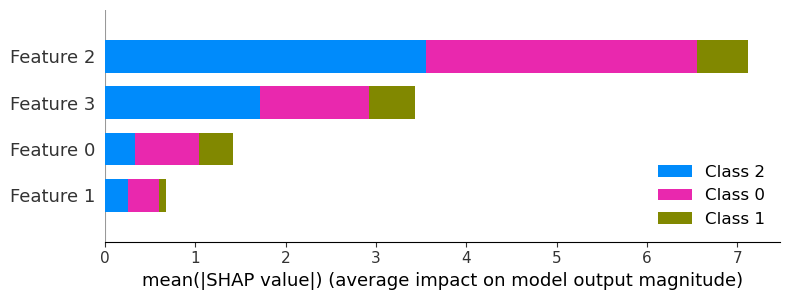

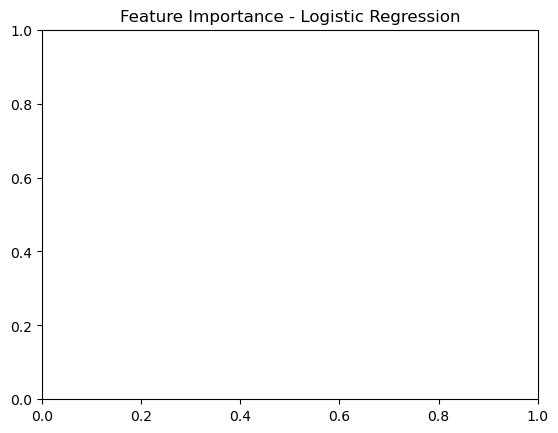

C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\3633826147.py:62: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(data=catboost_feature_importances_df, x='Importance', y='Feature', hue="Feature", palette='viridis', legend=False)


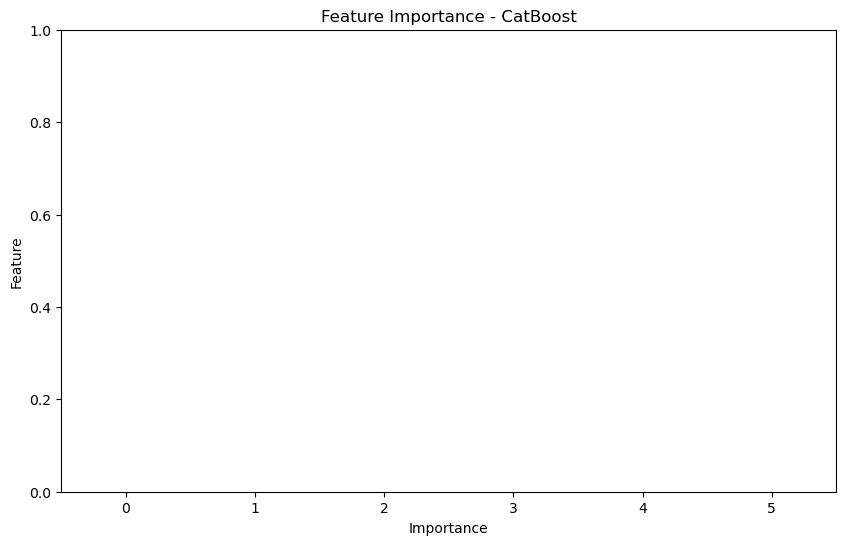

In [ ]:
pip install shap

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import shap
import pandas as pd


# Evaluate Logistic Regression on the test set / ƒê√°nh gi√° h·ªìi quy logistic tr√™n t·∫≠p ki·ªÉm tra
logistic_test_predictions = logistic_grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics for Logistic Regression / T√≠nh to√°n s·ªë li·ªáu ƒë√°nh gi√° cho H·ªìi quy Logistic
logistic_test_accuracy = accuracy_score(y_test, logistic_test_predictions)
logistic_test_precision = precision_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_recall = recall_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_f1 = f1_score(y_test, logistic_test_predictions, average='weighted')

# Print evaluation results for Logistic Regression / In k·∫øt qu·∫£ ƒë√°nh gi√° cho H·ªìi quy Logistic
print("Logistic Regression Test Set Evaluation:")
print(f"Accuracy: {logistic_test_accuracy:.4f}")
print(f"Precision: {logistic_test_precision:.4f}")
print(f"Recall: {logistic_test_recall:.4f}")
print(f"F1-score: {logistic_test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logistic_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, logistic_test_predictions))

# Evaluate CatBoost on the test set / ƒê√°nh gi√° CatBoost tr√™n b·ªô th·ª≠ nghi·ªám
catboost_test_predictions = catboost_grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics for CatBoost / T√≠nh to√°n s·ªë li·ªáu ƒë√°nh gi√° cho CatBoost
catboost_test_accuracy = accuracy_score(y_test, catboost_test_predictions)
catboost_test_precision = precision_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_recall = recall_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_f1 = f1_score(y_test, catboost_test_predictions, average='weighted')

# Print evaluation results for CatBoost / In k·∫øt qu·∫£ ƒë√°nh gi√° cho CatBoost
print("\nCatBoost Test Set Evaluation:")
print(f"Accuracy: {catboost_test_accuracy:.4f}")
print(f"Precision: {catboost_test_precision:.4f}")
print(f"Recall: {catboost_test_recall:.4f}")
print(f"F1-score: {catboost_test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, catboost_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, catboost_test_predictions))

# Visualize feature importance for Logistic Regression using SHAP / H√¨nh dung t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng ƒë·ªëi v·ªõi H·ªìi quy Logistic b·∫±ng c√°ch s·ª≠ d·ª•ng SHAP
explainer_logistic = shap.Explainer(logistic_grid_search.best_estimator_.named_steps['model'], X_train)
shap_values_logistic = explainer_logistic(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_logistic, X_test, plot_type="bar")
plt.title("Feature Importance - Logistic Regression")
plt.show()

# Visualize feature importance for CatBoost / H√¨nh dung t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng ƒë·ªëi v·ªõi CatBoost
catboost_feature_importances = catboost_grid_search.best_estimator_.named_steps['model'].get_feature_importance(prettified=True)
catboost_feature_importances_df = pd.DataFrame(catboost_feature_importances, columns=['Feature', 'Importance'])

plt.figure(figsize=(10, 6))
sns.barplot(data=catboost_feature_importances_df, x='Importance', y='Feature', hue="Feature", palette='viridis', legend=False)
plt.title("Feature Importance - CatBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Performance Metrics / S·ªë li·ªáu hi·ªáu su·∫•t
Use metrics like accuracy, precision, recall, F1-score, and confusion matrix to evaluate models. / S·ª≠ d·ª•ng c√°c s·ªë li·ªáu nh∆∞ ƒë·ªô ch√≠nh x√°c, ƒë·ªô ch√≠nh x√°c, kh·∫£ nƒÉng thu h·ªìi, ƒëi·ªÉm F1 v√† ma tr·∫≠n nh·∫ßm l·∫´n ƒë·ªÉ ƒë√°nh gi√° c√°c m√¥ h√¨nh.

Logistic Regression Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


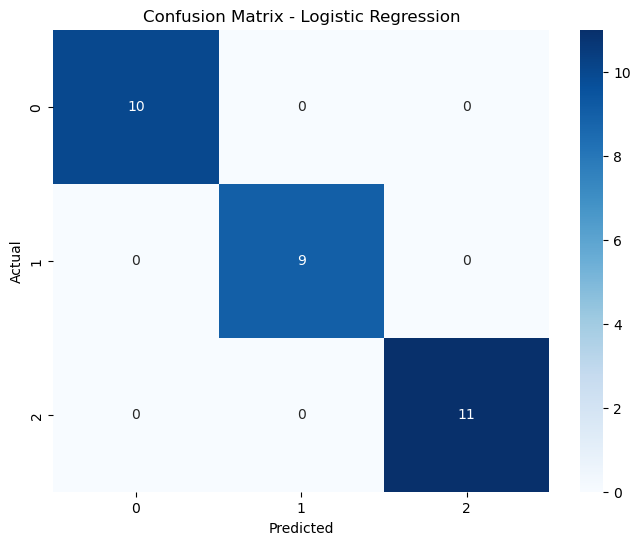


CatBoost Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


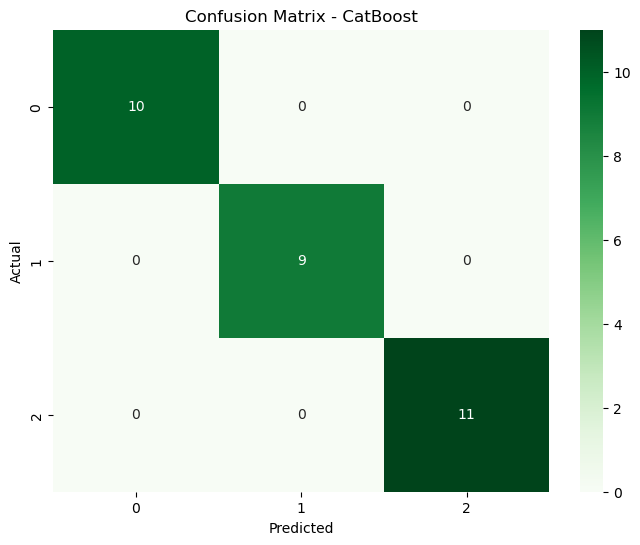

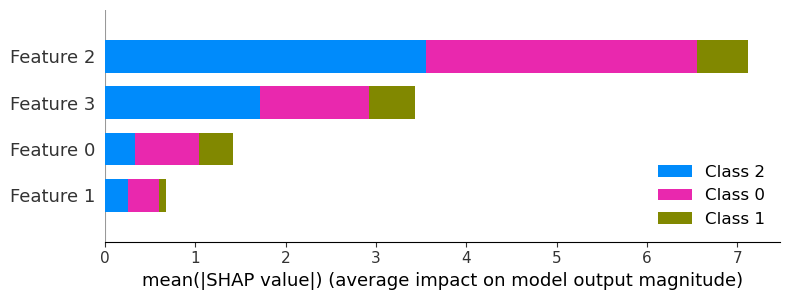

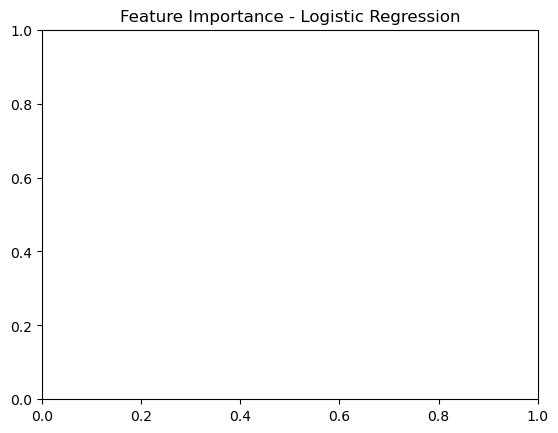

C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\2256260490.py:78: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(


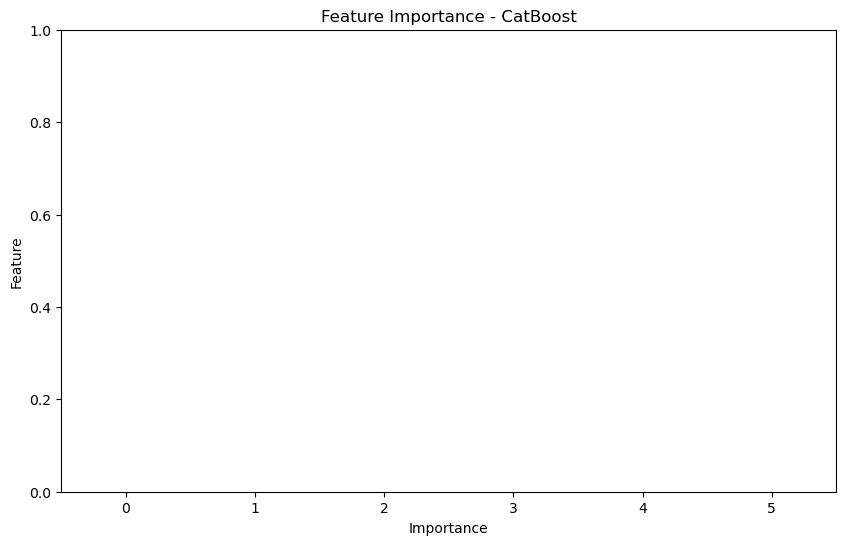

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import shap
import pandas as pd

# Evaluate Logistic Regression on the test set / ƒê√°nh gi√° h·ªìi quy logistic tr√™n t·∫≠p ki·ªÉm tra
logistic_test_predictions = logistic_grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics for Logistic Regression / T√≠nh to√°n s·ªë li·ªáu ƒë√°nh gi√° cho H·ªìi quy Logistic
logistic_test_accuracy = accuracy_score(y_test, logistic_test_predictions)
logistic_test_precision = precision_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_recall = recall_score(y_test, logistic_test_predictions, average='weighted')
logistic_test_f1 = f1_score(y_test, logistic_test_predictions, average='weighted')

# Print evaluation results for Logistic Regression / In k·∫øt qu·∫£ ƒë√°nh gi√° cho H·ªìi quy Logistic
print("Logistic Regression Test Set Evaluation:")
print(f"Accuracy: {logistic_test_accuracy:.4f}")
print(f"Precision: {logistic_test_precision:.4f}")
print(f"Recall: {logistic_test_recall:.4f}")
print(f"F1-score: {logistic_test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logistic_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, logistic_test_predictions))

# Plot confusion matrix for Logistic Regression / Ma tr·∫≠n nh·∫ßm l·∫´n ƒë·ªì th·ªã cho h·ªìi quy logistic
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logistic_test_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate CatBoost on the test set / ƒê√°nh gi√° CatBoost tr√™n b·ªô th·ª≠ nghi·ªám
catboost_test_predictions = catboost_grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics for CatBoost / T√≠nh to√°n s·ªë li·ªáu ƒë√°nh gi√° cho CatBoost
catboost_test_accuracy = accuracy_score(y_test, catboost_test_predictions)
catboost_test_precision = precision_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_recall = recall_score(y_test, catboost_test_predictions, average='weighted')
catboost_test_f1 = f1_score(y_test, catboost_test_predictions, average='weighted')

# Print evaluation results for CatBoost / In k·∫øt qu·∫£ ƒë√°nh gi√° cho CatBoost
print("\nCatBoost Test Set Evaluation:")
print(f"Accuracy: {catboost_test_accuracy:.4f}")
print(f"Precision: {catboost_test_precision:.4f}")
print(f"Recall: {catboost_test_recall:.4f}")
print(f"F1-score: {catboost_test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, catboost_test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, catboost_test_predictions))

# Plot confusion matrix for CatBoost / Ma tr·∫≠n nh·∫ßm l·∫´n ƒë·ªì th·ªã cho CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, catboost_test_predictions), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize feature importance for Logistic Regression using SHAP / H√¨nh dung t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng ƒë·ªëi v·ªõi H·ªìi quy Logistic b·∫±ng c√°ch s·ª≠ d·ª•ng SHAP
explainer_logistic = shap.Explainer(logistic_grid_search.best_estimator_.named_steps['model'], X_train)
shap_values_logistic = explainer_logistic(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_logistic, X_test, plot_type="bar")
plt.title("Feature Importance - Logistic Regression")
plt.show()

# Visualize feature importance for CatBoost / H√¨nh dung t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng ƒë·ªëi v·ªõi CatBoost
catboost_feature_importances = catboost_grid_search.best_estimator_.named_steps['model'].get_feature_importance(prettified=True)
catboost_feature_importances_df = pd.DataFrame(catboost_feature_importances, columns=['Feature', 'Importance'])

# C√°ch s·ª≠a l·ªói palette:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=catboost_feature_importances_df, 
    x='Importance', 
    y='Feature', 
    hue='Feature',  # Th√™m hue ƒë·ªÉ tr√°nh l·ªói
    palette='viridis', 
    legend=False  # T·∫Øt legend ƒë·ªÉ tr√°nh tr√πng m√†u
)
plt.title("Feature Importance - CatBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Feature Importance Analysis / Ph√¢n t√≠ch m·ª©c ƒë·ªô quan tr·ªçng c·ªßa t√≠nh nƒÉng
Analyze feature importance using SHAP values or CatBoost's built-in feature importance. / Ph√¢n t√≠ch m·ª©c ƒë·ªô quan tr·ªçng c·ªßa t√≠nh nƒÉng b·∫±ng c√°ch s·ª≠ d·ª•ng gi√° tr·ªã SHAP ho·∫∑c m·ª©c ƒë·ªô quan tr·ªçng c·ªßa t√≠nh nƒÉng t√≠ch h·ª£p s·∫µn c·ªßa CatBoost.

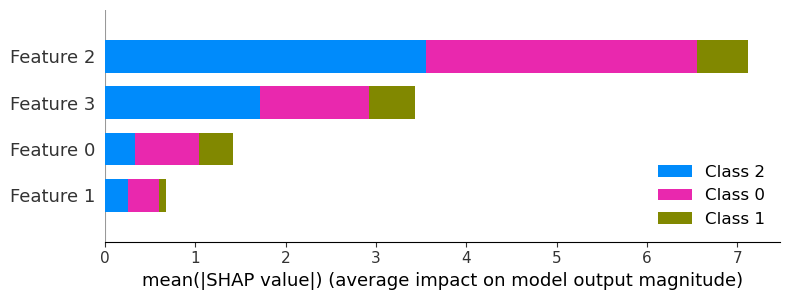

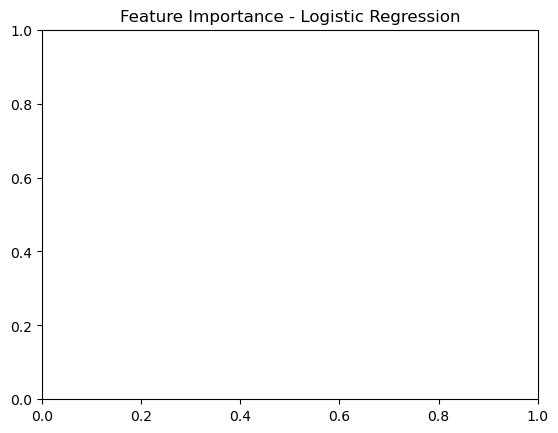

C:\Users\007mk\AppData\Local\Temp\ipykernel_7100\1749769103.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(data=catboost_feature_importances_df, x='Importance', y='Feature', hue="Feature", legend=False, palette="viridis")


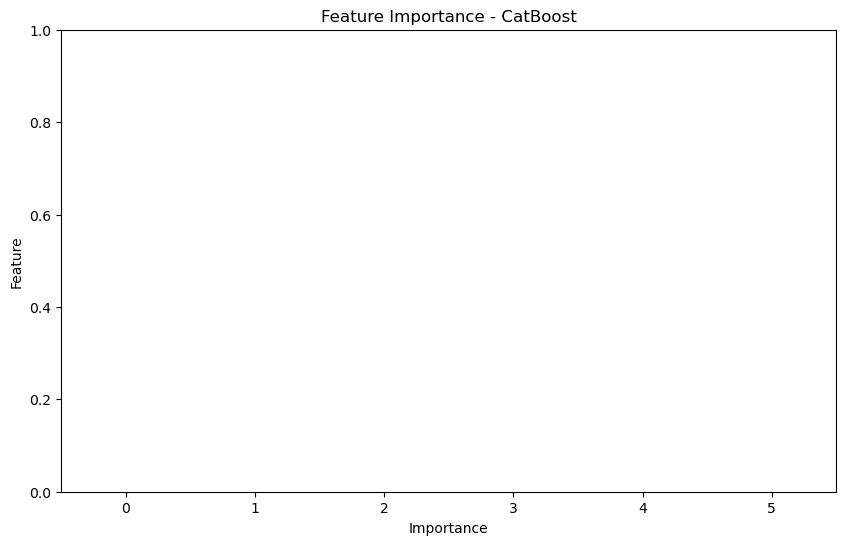

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance analysis for Logistic Regression using SHAP / Ph√¢n t√≠ch t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng cho h·ªìi quy logistic s·ª≠ d·ª•ng SHAP
explainer_logistic = shap.Explainer(logistic_grid_search.best_estimator_.named_steps['model'], X_train)
shap_values_logistic = explainer_logistic(X_test)

# SHAP summary plot for Logistic Regression / Bi·ªÉu ƒë·ªì t√≥m t·∫Øt SHAP cho h·ªìi quy logistic
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_logistic, X_test, plot_type="bar")
plt.title("Feature Importance - Logistic Regression")
plt.show()

# Feature importance analysis for CatBoost / Ph√¢n t√≠ch t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng cho CatBoost
catboost_feature_importances = catboost_grid_search.best_estimator_.named_steps['model'].get_feature_importance(prettified=True)
catboost_feature_importances_df = pd.DataFrame(catboost_feature_importances, columns=['Feature', 'Importance'])

# Bar plot for CatBoost feature importance / Bi·ªÉu ƒë·ªì thanh cho t·∫ßm quan tr·ªçng c·ªßa t√≠nh nƒÉng CatBoost
plt.figure(figsize=(10, 6))
sns.barplot(data=catboost_feature_importances_df, x='Importance', y='Feature', hue="Feature", legend=False, palette="viridis")
plt.title("Feature Importance - CatBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Check Overfitting v·ªõi Learning Curve(Logistic Recogression and CatBoost) / Ki·ªÉm tra Overfitting v·ªõi ƒê∆∞·ªùng cong h·ªçc t·∫≠p (H·ªìi quy logistic v√† CatBoost)


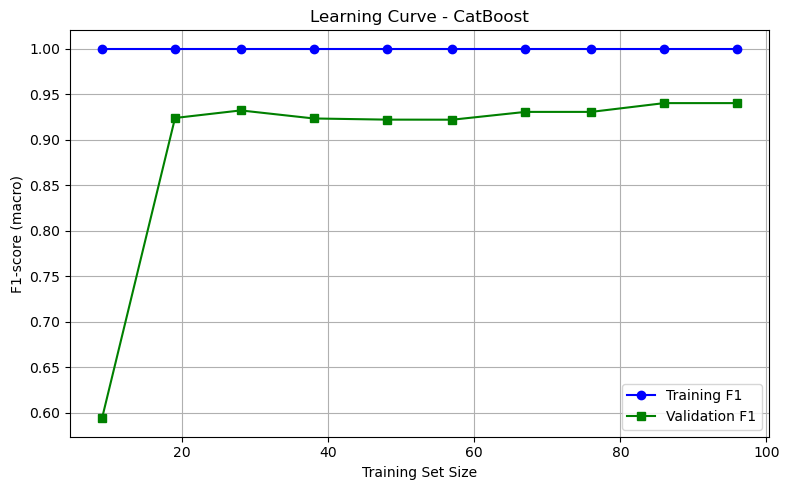

In [99]:
# Ki·ªÉm tra Overfitting v·ªõi Learning Curve (CatBoost)
from sklearn.model_selection import learning_curve
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(verbose=0, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    catboost_model, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training F1', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Validation F1', marker='s', color='green')
plt.xlabel("Training Set Size")
plt.ylabel("F1-score (macro)")
plt.title("Learning Curve - CatBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

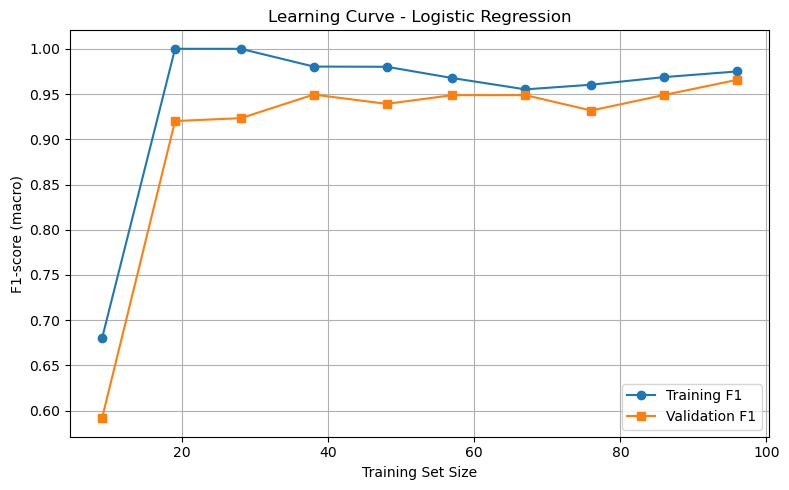

In [105]:
# Ki·ªÉm tra Overfitting v·ªõi Learning Curve (Logistic Regression)

from sklearn.model_selection import learning_curve

log_reg = LogisticRegression(max_iter=1000, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training F1', marker='o')
plt.plot(train_sizes, test_mean, label='Validation F1', marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("F1-score (macro)")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Final Model Selection / L·ª±a ch·ªçn m√¥ h√¨nh cu·ªëi c√πng
Select the best-performing model for deployment based on evaluation metrics. / Ch·ªçn m√¥ h√¨nh c√≥ hi·ªáu su·∫•t t·ªët nh·∫•t ƒë·ªÉ tri·ªÉn khai d·ª±a tr√™n s·ªë li·ªáu ƒë√°nh gi√°.

In [ ]:
# So s√°nh F1-score t·ª´ test set
if logistic_test_f1 > catboost_test_f1:
    print("Logistic Regression is the better model based on test F1-score.")
    best_model = logistic_grid_search.best_estimator_
    best_model_name = "Logistic Regression"
elif logistic_test_f1 < catboost_test_f1:
    print("CatBoost is the better model based on test F1-score.")
    best_model = catboost_grid_search.best_estimator_
    best_model_name = "CatBoost"
else:
    print("Both models have the same F1-score on test set.")
    # Optional: Choose based on another criterion (e.g., training time, simplicity, etc.) / T√πy ch·ªçn: Ch·ªçn d·ª±a tr√™n ti√™u ch√≠ kh√°c (v√≠ d·ª•: th·ªùi gian ƒë√†o t·∫°o, t√≠nh ƒë∆°n gi·∫£n, v.v.)
    print("Choosing Logistic Regression as the default.")
    best_model = logistic_grid_search.best_estimator_
    best_model_name = "Logistic Regression"

# L∆∞u m√¥ h√¨nh cu·ªëi c√πng
import joblib
model_filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(best_model, model_filename)
print(f"The best model ({best_model_name}) has been saved as {model_filename}.")


Both models have the same F1-score on test set.
Choosing Logistic Regression as the default.
The best model (Logistic Regression) has been saved as best_model_logistic_regression.pkl.


# Check information model / Ki·ªÉm tra th√¥ng tin m√¥ h√¨nh

In [102]:
import joblib

# ƒê·ªçc m√¥ h√¨nh t·ª´ file
model = joblib.load("best_model_logistic_regression.pkl")

# Hi·ªÉn th·ªã th√¥ng tin m√¥ h√¨nh
print("Th√¥ng tin m√¥ h√¨nh:", model)

# Hi·ªÉn th·ªã t·∫•t c·∫£ tham s·ªë
print("\nTham s·ªë m√¥ h√¨nh:")
print(model.get_params())

# Hi·ªÉn th·ªã tr·ªçng s·ªë c·ªßa c√°c ƒë·∫∑c tr∆∞ng
if hasattr(model, "coef_"):
    print("\nTr·ªçng s·ªë c·ªßa c√°c ƒë·∫∑c tr∆∞ng:")
    print(model.coef_)

# Hi·ªÉn th·ªã h·ªá s·ªë ch·∫∑n (bias)
if hasattr(model, "intercept_"):
    print("\nH·ªá s·ªë ch·∫∑n (bias):")
    print(model.intercept_)

# Hi·ªÉn th·ªã danh s√°ch c√°c thu·ªôc t√≠nh c·ªßa m√¥ h√¨nh
print("\nDanh s√°ch c√°c thu·ªôc t√≠nh c·ªßa m√¥ h√¨nh:")
print(dir(model))


Th√¥ng tin m√¥ h√¨nh: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, max_iter=1000, random_state=42,
                                    solver='saga'))])

Tham s·ªë m√¥ h√¨nh:
{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga'))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__C': 1, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'deprecated', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': 42, 'model__solver': 'saga', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}

Danh 

In [ ]:

# Load the saved Logistic Regression model / T·∫£i m√¥ h√¨nh h·ªìi quy logistic ƒë√£ l∆∞u
with open("best_model_logistic_regression.pkl", "rb") as file:

    # Display basic information about the model / Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n v·ªÅ m√¥ h√¨nh
    print("Model Type:", type(model))
    print("Model Parameters:", model.get_params())

    # Display the coefficients (if applicable) / Hi·ªÉn th·ªã c√°c h·ªá s·ªë (n·∫øu c√≥)
    if hasattr(model, "coef_"):
        print("\nFeature Coefficients:")
        print(model.coef_)

    # Display the intercept (bias) / Hi·ªÉn th·ªã gi√° tr·ªã ch·∫∑n (ƒë·ªô l·ªách)
    if hasattr(model, "intercept_"):
        print("\nIntercept (Bias):")
        print(model.intercept_)

    # Display all attributes of the model / Hi·ªÉn th·ªã t·∫•t c·∫£ c√°c thu·ªôc t√≠nh c·ªßa m√¥ h√¨nh
    print("\nModel Attributes:")
    print(dir(model))


Model Type: <class 'sklearn.pipeline.Pipeline'>
Model Parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga'))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__C': 1, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'deprecated', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': 42, 'model__solver': 'saga', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}

Model Attributes:
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__ge

# Check the details of the trained Logistic Regression model / Ki·ªÉm tra chi ti·∫øt m√¥ h√¨nh Logistic Regression ƒë√£ hu·∫•n luy·ªán

In [ ]:
import joblib

# Load the saved Logistic Regression model (using joblib) / T·∫£i m√¥ h√¨nh h·ªìi quy logistic ƒë√£ l∆∞u (s·ª≠ d·ª•ng joblib)
logistic_model = joblib.load("best_model_logistic_regression.pkl")

# Assuming you have new data that needs to be predicted, replace with your actual test data / Gi·∫£ s·ª≠ b·∫°n c√≥ d·ªØ li·ªáu m·ªõi c·∫ßn d·ª± ƒëo√°n, h√£y thay th·∫ø b·∫±ng d·ªØ li·ªáu th·ª≠ nghi·ªám th·ª±c t·∫ø c·ªßa b·∫°n
X_test = np.array([[5.1, 3.5, 1.4, 0.2],  # Replace with actual test data / Thay th·∫ø b·∫±ng d·ªØ li·ªáu th·ª≠ nghi·ªám th·ª±c t·∫ø
                   [6.2, 3.4, 5.4, 2.3]])

# Make predictions / ƒê∆∞a ra d·ª± ƒëo√°n
predictions = logistic_model.predict(X_test)

# Example class labels (replace these with the actual labels from your dataset) / Nh√£n l·ªõp v√≠ d·ª• (thay th·∫ø ch√∫ng b·∫±ng nh√£n th·ª±c t·∫ø t·ª´ t·∫≠p d·ªØ li·ªáu c·ªßa b·∫°n)
class_labels = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

# Flatten the predictions array if it's 2D / L√†m ph·∫≥ng m·∫£ng d·ª± ƒëo√°n n·∫øu n√≥ l√† 2D
predictions = predictions.flatten()

# Map the predicted labels to the class names / √Ånh x·∫° c√°c nh√£n d·ª± ƒëo√°n v√†o t√™n l·ªõp
predicted_class_names = [class_labels[pred] for pred in predictions]

# Output the predicted class names instead of numeric labels / ƒê·∫ßu ra t√™n l·ªõp d·ª± ƒëo√°n thay v√¨ nh√£n s·ªë
print("Predicted Class Names:", predicted_class_names)

# If you want to see the raw numeric predictions as well / N·∫øu b·∫°n c≈©ng mu·ªën xem c√°c d·ª± ƒëo√°n s·ªë th√¥
print("Raw Predictions:", predictions)


Predicted Class Names: ['Setosa', 'Virginica']
Raw Predictions: [0 2]
